<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-base-data" data-toc-modified-id="Compare-base-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare base data</a></span><ul class="toc-item"><li><span><a href="#Zone-Schemas" data-toc-modified-id="Zone-Schemas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Zone Schemas</a></span></li><li><span><a href="#Border-Crossings" data-toc-modified-id="Border-Crossings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Border Crossings</a></span></li></ul></li><li><span><a href="#Tour-Scheduling" data-toc-modified-id="Tour-Scheduling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tour Scheduling</a></span></li><li><span><a href="#Tour-OD-Choice" data-toc-modified-id="Tour-OD-Choice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tour OD Choice</a></span><ul class="toc-item"><li><span><a href="#Tour-Origin" data-toc-modified-id="Tour-Origin-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tour Origin</a></span></li><li><span><a href="#Tour-Destination-p-MSA-by-Origin" data-toc-modified-id="Tour-Destination-p-MSA-by-Origin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tour Destination p-MSA by Origin</a></span></li><li><span><a href="#Tour-OD-Dist-by-Tour-OD-Count-Difference" data-toc-modified-id="Tour-OD-Dist-by-Tour-OD-Count-Difference-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tour OD Dist by Tour OD Count Difference</a></span></li><li><span><a href="#Tour-Distance-by-Tour-Mode" data-toc-modified-id="Tour-Distance-by-Tour-Mode-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tour Distance by Tour Mode</a></span></li><li><span><a href="#Tour-Distance-by-Tour-Mode-by-POE" data-toc-modified-id="Tour-Distance-by-Tour-Mode-by-POE-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tour Distance by Tour Mode by POE</a></span></li><li><span><a href="#Tour-Distance-by-Intra-MAZ-Tour-Flag" data-toc-modified-id="Tour-Distance-by-Intra-MAZ-Tour-Flag-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Tour Distance by Intra-MAZ Tour Flag</a></span></li></ul></li><li><span><a href="#Tour-Mode-Choice" data-toc-modified-id="Tour-Mode-Choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tour Mode Choice</a></span><ul class="toc-item"><li><span><a href="#Tour-Mode-by-POE" data-toc-modified-id="Tour-Mode-by-POE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tour Mode by POE</a></span></li><li><span><a href="#Tour-Mode-by-Tour-Purpose" data-toc-modified-id="Tour-Mode-by-Tour-Purpose-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tour Mode by Tour Purpose</a></span></li></ul></li><li><span><a href="#Stop-Frequency" data-toc-modified-id="Stop-Frequency-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop Frequency</a></span></li><li><span><a href="#Trip-Purpose" data-toc-modified-id="Trip-Purpose-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Trip Purpose</a></span><ul class="toc-item"><li><span><a href="#Trips-per-Tour-by-Trip-Purpose" data-toc-modified-id="Trips-per-Tour-by-Trip-Purpose-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Trips per Tour by Trip Purpose</a></span></li></ul></li><li><span><a href="#Trip-Scheduling" data-toc-modified-id="Trip-Scheduling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trip Scheduling</a></span></li><li><span><a href="#Trip-Destination" data-toc-modified-id="Trip-Destination-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Trip Destination</a></span><ul class="toc-item"><li><span><a href="#Trip-ODs" data-toc-modified-id="Trip-ODs-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Trip ODs</a></span></li><li><span><a href="#Trip-Distance" data-toc-modified-id="Trip-Distance-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Trip Distance</a></span></li></ul></li><li><span><a href="#Trip-Mode" data-toc-modified-id="Trip-Mode-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Trip Mode</a></span><ul class="toc-item"><li><span><a href="#Trip-Mode-by-Tour-Mode" data-toc-modified-id="Trip-Mode-by-Tour-Mode-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Trip Mode by Tour Mode</a></span></li><li><span><a href="#Trip-Distance-by-Trip-Mode" data-toc-modified-id="Trip-Distance-by-Trip-Mode-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Trip Distance by Trip Mode</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exploration</a></span></li></ul></div>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Survey_tours_w_dist[(Survey_tours_w_dist.sov_dist > 70)& (Survey_tours_w_dist.poe_id ==2)].groupby('dest_taz')[['sample_rate']].sum().to_csv(r'E:\Projects\Clients\sandag\xborder\Models\Calibration\output\tecate_longtours_dests.csv')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import openmatrix as omx
from matplotlib import pyplot as plt
# import geopandas as gpd
%matplotlib inline

In [4]:
import xlsxwriter
import matplotlib.ticker as ticker
import warnings 
warnings.filterwarnings('ignore')

In [5]:
Survey_trips = pd.read_csv(r'../output\Survey\trips_asim.csv')
Survey_tours = pd.read_csv(r'../output\Survey\tours_asim.csv')

mode_ids = {1: 'DRIVEALONE', 2:'SHARED2', 3:'SHARED3', 4:'WALK', 6:'WALK_TRANSIT', 10:'TAXI', 11:'TNC_SINGLE', 12:'TNC_SHARED'}
purpose_ids = {-1: 'home', 0:'work', 1:'school', 2:'cargo', 3:'shop', 4:'visit', 5:'other'}



In [6]:
skims = omx.open_file(r'..\data\traffic_skims_xborder_EA.omx')
mazs = pd.read_csv(r'..\data\mazs_xborder.csv')
mazs.set_index('MAZ', inplace=True)
maz_to_taz = mazs['TAZ']
maz_to_ext_taz = mazs['external_TAZ']
ext_maz_to_maz = mazs['original_MAZ']

In [7]:
Survey_trips = Survey_trips.merge(Survey_tours, left_on='tour_id', right_on='tour_id', suffixes=('', '_tour'))
Survey_tours = Survey_tours.merge(Survey_trips[['tour_id','sample_rate']].drop_duplicates(), on='tour_id',  how = 'left', suffixes=('', '_tour'))

In [8]:
Survey_trips['source'] = 'Survey'
Survey_tours['source'] = 'Survey'

In [9]:
asim_trips = pd.read_csv(r'..\output\final_trips.csv')
asim_tours = pd.read_csv(r'..\output\final_tours.csv')

In [10]:
asim_trips = asim_trips.merge(asim_tours, left_on='tour_id', right_on='tour_id', suffixes=('', '_tour'))

In [11]:
print(len(asim_trips),Survey_trips.sample_rate.sum())
print(len(asim_tours),Survey_tours.sample_rate.sum())

449503 424363.46689243
113995 107564.01314831001


In [12]:
asim_tours['dest_taz'] = asim_tours['destination'].map(maz_to_taz)
asim_tours['orig_taz'] = asim_tours['origin'].map(maz_to_taz)
asim_trips['dest_taz'] = asim_trips['destination'].map(maz_to_taz)
asim_trips['orig_taz'] = asim_trips['origin'].map(maz_to_taz)

In [13]:
Survey_tours['dest_taz'] = Survey_tours['destination'].map(maz_to_taz)
Survey_tours['orig_taz'] = Survey_tours['origin'].map(maz_to_taz)
Survey_trips['dest_taz'] = Survey_trips['destination'].map(maz_to_taz)
Survey_trips['orig_taz'] = Survey_trips['origin'].map(maz_to_taz)

In [14]:
asim_trips['source'] = 'asim'
asim_tours['source'] = 'asim'

## Compare base data

### Zone Schemas 

Activitysim created new MAZ IDs for POE's

In [15]:
print((
    "max. tour origin MAZ -- Survey: {0} // asim: {1} \n"
    "max. tour dest MAZ -- Survey: {2} // asim: {3} \n"
    "max. trip orig MAZ -- Survey {4} // asim {5} \n"
    "max. trip dest MAZ -- Survey {6} // asim {7} \n").format(
        Survey_tours['origin'].max(), asim_tours['origin'].max(),
        Survey_tours['destination'].max(), asim_tours['destination'].max(),
        Survey_trips['origin'].max(), asim_trips['origin'].max(),
        Survey_trips['destination'].max(), asim_trips['destination'].max()
    )
)

max. tour origin MAZ -- Survey: 23005 // asim: 23005 
max. tour dest MAZ -- Survey: 22943.0 // asim: 22941 
max. trip orig MAZ -- Survey 23005 // asim 23005 
max. trip dest MAZ -- Survey 23005 // asim 23005 



But the TAZ IDs should still match up

In [16]:
print((
    "min. tour origin TAZ -- Survey: {0} // asim: {1} \n"
    "max. tour origin TAZ -- Survey: {2} // asim: {3} \n"
    "min. tour dest TAZ -- Survey: {4} // asim: {5} \n"
    "min. trip orig TAZ -- Survey {6} // asim {7} \n"
    "min. trip dest TAZ -- Survey {8} // asim {9} \n").format(
        Survey_tours['orig_taz'].min(), asim_tours['orig_taz'].min(),
        Survey_tours['orig_taz'].max(), asim_tours['orig_taz'].max(),
        Survey_tours['dest_taz'].min(), asim_tours['dest_taz'].min(),
        Survey_trips['orig_taz'].min(), asim_trips['orig_taz'].min(),
        Survey_trips['dest_taz'].min(), asim_trips['dest_taz'].min()
    )
)

min. tour origin TAZ -- Survey: 1 // asim: 1 
max. tour origin TAZ -- Survey: 4 // asim: 4 
min. tour dest TAZ -- Survey: 94 // asim: 125 
min. trip orig TAZ -- Survey 1 // asim 1 
min. trip dest TAZ -- Survey 1 // asim 1 



For validation we convert the new MAZ IDs back to the original because they don't exist in CTRAMP

In [17]:
new_mazs = asim_tours['origin'].unique()
# asim_tours['origin'] = asim_tours['origin'].map(ext_maz_to_maz)

In [18]:
for od in ['origin', 'destination']:
    od_mask = asim_trips[od].isin(new_mazs)
    asim_trips.loc[od_mask, od] = asim_trips.loc[od_mask, od].map(ext_maz_to_maz)

In [19]:
print((
    "max. tour origin MAZ -- Survey: {0} // asim: {1} \n"
    "max. tour dest MAZ -- Survey: {2} // asim: {3} \n"
    "max. trip orig MAZ -- Survey {4} // asim {5} \n"
    "max. trip dest MAZ -- Survey {6} // asim {7} \n").format(
        Survey_tours['origin'].max(), asim_tours['origin'].max(),
        Survey_tours['destination'].max(), asim_tours['destination'].max(),
        Survey_trips['origin'].max(), asim_trips['origin'].max(),
        Survey_trips['destination'].max(), asim_trips['destination'].max()
    )
)

max. tour origin MAZ -- Survey: 23005 // asim: 23005 
max. tour dest MAZ -- Survey: 22943.0 // asim: 22941 
max. trip orig MAZ -- Survey 23005 // asim 22971 
max. trip dest MAZ -- Survey 23005 // asim 22971 



### Border Crossings 

In [20]:
asim_tours['sentri_crossing'] = 0
asim_tours.loc[asim_tours.pass_type == 'sentri','sentri_crossing'] = 1
Survey_tours['sentri'] = 0
Survey_tours.loc[Survey_tours.pass_type == 'sentri','sentri'] = 1

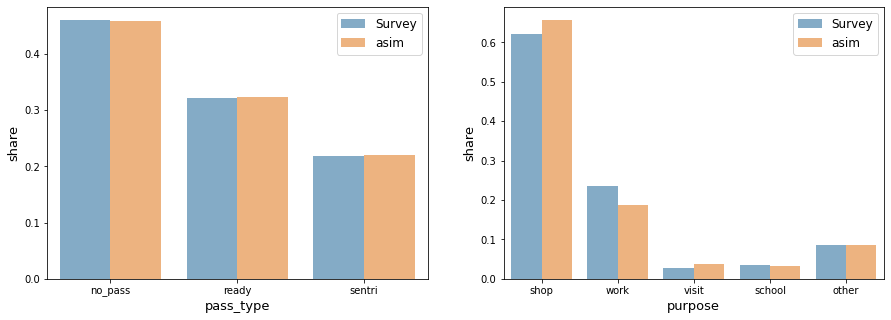

In [21]:
fig, axarr = plt.subplots(1,2,figsize=(15,5))
sentri_shares = pd.DataFrame((
    (Survey_tours.groupby('pass_type')['sample_rate'].sum()/Survey_tours['sample_rate'].sum()),
    (asim_tours['pass_type'].value_counts() / len(asim_tours))))
sentri_shares.index = ['Survey', 'asim']
sentri_shares.index.name = 'source'
sentri_shares.reset_index(inplace=True)
sentri_shares = sentri_shares.melt(id_vars='source', value_name='share', var_name='pass_type')

asim_purpose_shares = pd.DataFrame(asim_tours['tour_type'].value_counts(sort=False) / asim_tours.shape[0]).reset_index()
asim_purpose_shares.columns = ['purpose', 'share']
asim_purpose_shares['source'] = 'asim'
Survey_purpose_shares = pd.DataFrame(Survey_tours['tour_type'].value_counts(sort=False) / Survey_tours.shape[0]).reset_index()
Survey_purpose_shares.columns = ['purpose', 'share']
Survey_purpose_shares['source'] = 'Survey'
purpose_shares = pd.concat((asim_purpose_shares, Survey_purpose_shares))

sns.barplot(data=sentri_shares.sort_values('source'), x='pass_type', y='share', hue='source', ax=axarr[0],alpha=0.6)
sns.barplot(data=purpose_shares.sort_values('source'), x='purpose', y='share', hue='source', ax=axarr[1], alpha=0.6)

for ax in axarr:
    ax.legend(fontsize=12)
    ax.set_ylabel('share', fontsize=13)
    ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=10)
    ax.set_xlabel(ax.get_xlabel(), fontsize=13)

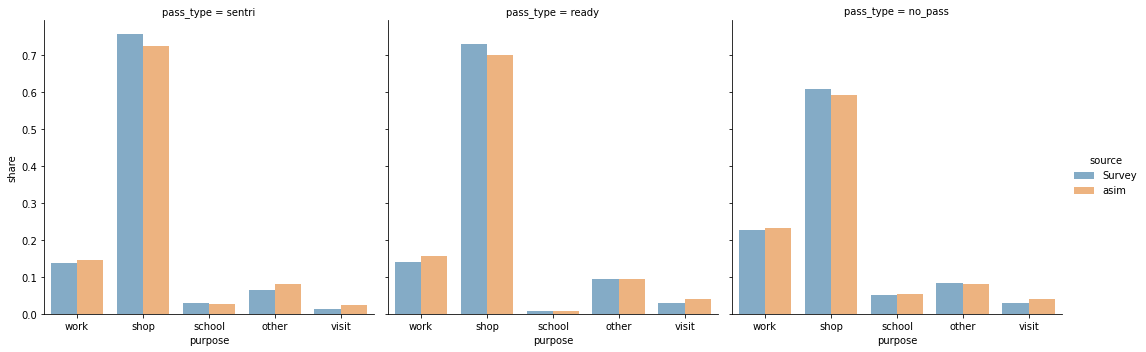

In [22]:
asim_purp_poe_shares = asim_tours.groupby(['pass_type','tour_type'])['tour_id'].count().reset_index(level='tour_type').merge(
    asim_tours.groupby('pass_type').count().rename(
        columns={'tour_id':'total'})[['total']], left_index=True, right_index=True).reset_index()
asim_purp_poe_shares['share'] = asim_purp_poe_shares['tour_id'] / asim_purp_poe_shares['total']
asim_purp_poe_shares.columns = ['pass_type','purpose','count','total','share']
asim_purp_poe_shares['source'] = 'asim'

Survey_purp_poe_shares = Survey_tours.groupby(['pass_type','tour_type'])['sample_rate'].sum().reset_index(level='tour_type').merge(
    Survey_tours.groupby('pass_type').sum().rename(
        columns={'sample_rate':'total'})[['total']], left_index=True, right_index=True).reset_index()
Survey_purp_poe_shares['share'] = Survey_purp_poe_shares['sample_rate'] / Survey_purp_poe_shares['total']
Survey_purp_poe_shares.columns = ['pass_type','purpose','count','total','share']
Survey_purp_poe_shares['source'] = 'Survey'
purp_poe_shares = pd.concat((asim_purp_poe_shares,Survey_purp_poe_shares))

sns.catplot(data=purp_poe_shares.sort_values('source'), x='purpose', y='share', hue='source', col='pass_type',kind='bar', alpha=0.6)

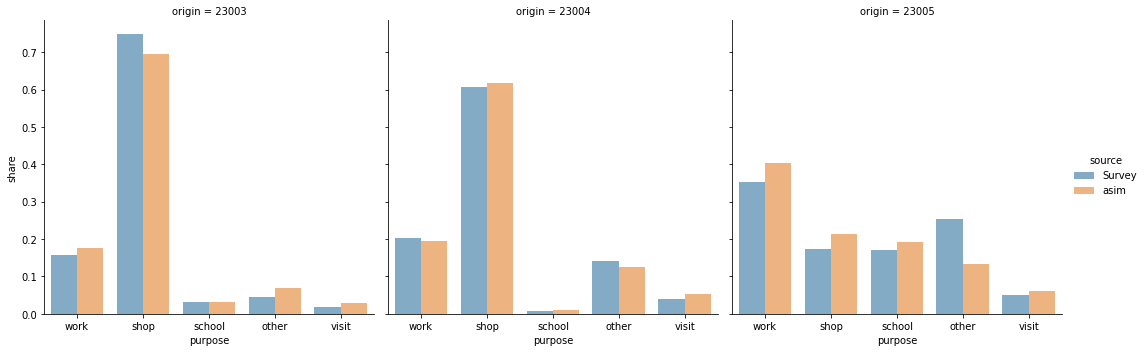

In [23]:
asim_purp_poe_shares = asim_tours.groupby(['origin','tour_type'])['tour_id'].count().reset_index(level='tour_type').merge(
    asim_tours.groupby('origin').count().rename(
        columns={'tour_id':'origin_total'})[['origin_total']], left_index=True, right_index=True).reset_index()
asim_purp_poe_shares['share'] = asim_purp_poe_shares['tour_id'] / asim_purp_poe_shares['origin_total']
asim_purp_poe_shares.columns = ['origin','purpose','count','total','share']
asim_purp_poe_shares['source'] = 'asim'

Survey_purp_poe_shares = Survey_tours.groupby(['origin','tour_type'])['sample_rate'].sum().reset_index(level='tour_type').merge(
    Survey_tours.groupby('origin').sum().rename(
        columns={'sample_rate':'origin_total'})[['origin_total']], left_index=True, right_index=True).reset_index()
Survey_purp_poe_shares['share'] = Survey_purp_poe_shares['sample_rate'] / Survey_purp_poe_shares['origin_total']
Survey_purp_poe_shares.columns = ['origin','purpose','count','total','share']
Survey_purp_poe_shares['source'] = 'Survey'
purp_poe_shares = pd.concat((asim_purp_poe_shares,Survey_purp_poe_shares))

sns.catplot(data=purp_poe_shares.sort_values('source'), x='purpose', y='share', hue='source', col='origin',kind='bar', alpha=0.6)

In [24]:
writer = pd.ExcelWriter(r'..\output\calibration_temp.xlsx', engine = 'xlsxwriter')
workbook = writer.book


In [25]:
poe_calib = purp_poe_shares.groupby(['origin','purpose','source'],as_index = False)[['share']].sum()
poe_calib.loc[poe_calib.purpose.isin(['visit','other']),'purpose'] = 'visit_other'

poe_calib = poe_calib.pivot_table(values='share', 
        index=['origin', 'purpose'], 
        columns='source', 
        aggfunc=np.sum)
poe_calib['fac'] = np.log(poe_calib['Survey']/poe_calib['asim'])
poe_calib.to_excel(writer,sheet_name = 'POE_CONSTANT')
# poe_calib

In [26]:
# poe_calib.reset_index().groupby('origin')[['Survey','asim']].sum()

## Tour Scheduling 

In [27]:
#timeslabes
# fig, ax = plt.subplots(figsize=(15,7))
# sns.kdeplot(data=Survey_tours, x='start',weights=Survey_tours.sample_rate, ax=ax, label='Survey', alpha=0.4, lw=3, )
# sns.kdeplot(data=asim_tours, x='start', ax=ax, label='asim', alpha=0.4, lw=3)
# ax.legend(fontsize=13)
# ax.set_ylabel('density', fontsize=13)
# ax.set_xlabel('tour departure hour', fontsize=15)

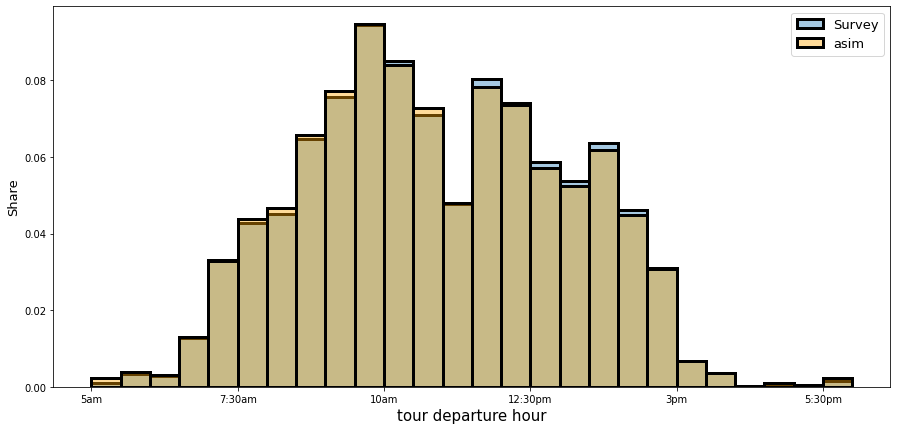

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
Survey_tours['sample_rate_share'] = Survey_tours['sample_rate'] / Survey_tours['sample_rate'].sum()
asim_tours['share'] = 1/len(asim_tours)
sns.histplot(data=Survey_tours, x='start',weights=Survey_tours.sample_rate_share, ax=ax,binwidth = 1, label='Survey', alpha=0.4, lw=3)
sns.histplot(data=asim_tours,  x='start', weights=asim_tours.share, binwidth =1,ax=ax, label='asim', color = 'orange',alpha=0.4, lw=3)
ax.legend(fontsize=13)
ax.set_ylabel('Share', fontsize=13)
ax.set_xlabel('tour departure hour', fontsize=15)
ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm']);

In [29]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.histplot(data=Survey_tours, x='start',weights=Survey_tours.sample_rate, ax=ax,binwidth = 1, label='Survey', alpha=0.4, lw=3, kde = True)
# sns.histplot(data=asim_tours,  x='start', weights=[1 for i in range(len(asim_tours))], binwidth =1,ax=ax, label='asim', color = 'orange',alpha=0.4,kde = True, lw=3)
# ax.legend(fontsize=13)
# ax.set_ylabel('density', fontsize=13)
# ax.set_xlabel('tour departure hour', fontsize=15)
# ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm'])

In [30]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.kdeplot(data=Survey_tours, x='end', ax=ax,weights = Survey_tours.sample_rate, label='Survey', alpha=0.4, lw=3, )
# sns.kdeplot(data=asim_tours, x='end', ax=ax, label='asim', alpha=0.4, lw=3)
# ax.legend(fontsize=13)
# ax.set_ylabel('density', fontsize=13)
# ax.set_xlabel('tour anchor arrival hour', fontsize=15)

[Text(5.0, 0, '5am'),
 Text(10.0, 0, '7:30am'),
 Text(15.0, 0, '10am'),
 Text(20.0, 0, '12:30pm'),
 Text(25.0, 0, '3pm'),
 Text(30.0, 0, '5:30pm'),
 Text(35.0, 0, '8pm'),
 Text(40.0, 0, '10:30pm'),
 Text(45.0, 0, '')]

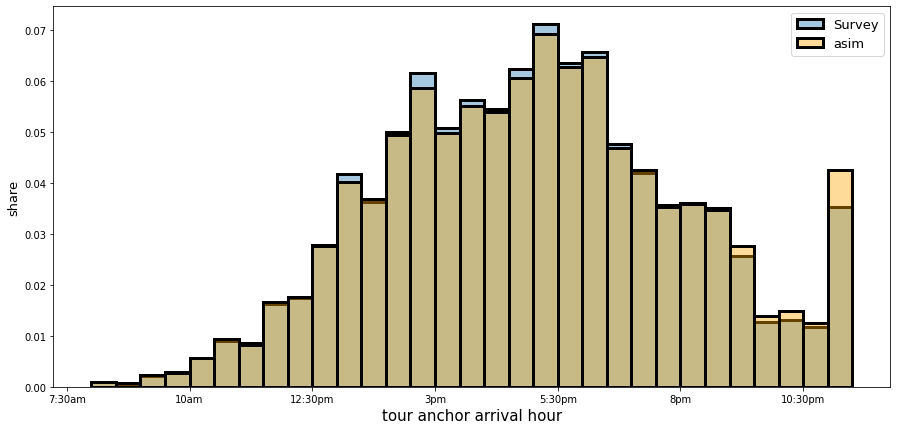

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=Survey_tours, x='end',weights=Survey_tours.sample_rate_share, ax=ax,binwidth = 1, label='Survey', alpha=0.4, lw=3)
sns.histplot(data=asim_tours,  x='end', weights=asim_tours.share, binwidth =1,ax=ax, label='asim', color = 'orange',alpha=0.4, lw=3)
ax.legend(fontsize=13)
ax.set_ylabel('share', fontsize=13)
ax.set_xlabel('tour anchor arrival hour', fontsize=15)
ax.set_xticklabels(['5am','7:30am','10am','12:30pm','3pm','5:30pm', '8pm','10:30pm'])

## Tour OD Choice 

### Tour Origin

Text(0.5, 0, 'POE')

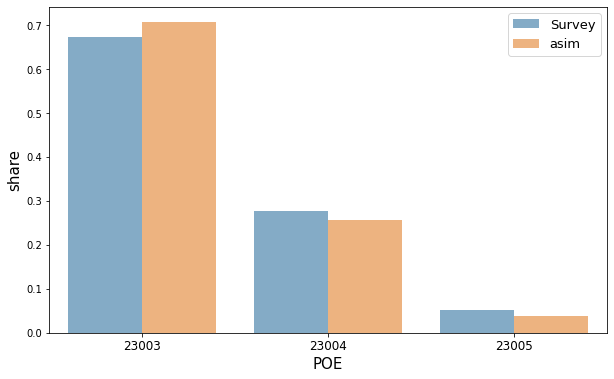

In [32]:
asim_poe_shares = pd.DataFrame(asim_tours['origin'].value_counts(sort=False) / asim_tours.shape[0]).reset_index()
asim_poe_shares.columns = ['poe', 'share']
asim_poe_shares['source'] = 'asim'
Survey_poe_shares = pd.DataFrame(Survey_tours.groupby('origin')['sample_rate'].sum() / Survey_tours.sample_rate.sum()).reset_index()
Survey_poe_shares.columns = ['poe', 'share']
Survey_poe_shares['source'] = 'Survey'
poe_shares = pd.concat((asim_poe_shares, Survey_poe_shares))
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=poe_shares.sort_values('source'), x='poe', y='share', hue='source',ax=ax, alpha=0.6)

ax.legend(fontsize=13)
ax.set_ylabel('share', fontsize=15)
ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=12)
ax.set_xlabel('POE', fontsize=15)

In [33]:
poe_calib1 = poe_shares.pivot(index = 'poe',columns = 'source', values = 'share')
poe_calib1['fac'] = np.log(poe_calib1['Survey']/poe_calib1['asim'])
poe_calib1.to_excel(writer,sheet_name = 'TECATE')

### Tour Destination p-MSA by Origin 

In [34]:
asim_tours['dest_pseudomsa'] = asim_tours['destination'].map(mazs['pseudomsa'])
Survey_tours['dest_pseudomsa'] = Survey_tours['destination'].map(mazs['pseudomsa'])
asim_tour_ods = asim_tours.groupby(['origin','dest_pseudomsa'])['tour_id'].count().reset_index()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_pseudomsa'])['household_id'].count().reset_index()
Survey_tour_ods.rename(columns={'originMGRA': 'origin'}, inplace=True)

all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, left_on=['origin','dest_pseudomsa'],
    right_on=['origin','dest_pseudomsa'], how='outer')
all_ods.rename(columns={'household_id':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods = all_ods.melt(id_vars=['origin','dest_pseudomsa'], var_name='source', value_name='num_tours')

In [35]:
asim_tours['dest_pseudomsa'] = asim_tours['destination'].map(mazs['pseudomsa'])
Survey_tours['dest_pseudomsa'] = Survey_tours['destination'].map(mazs['pseudomsa'])
asim_tour_ods = asim_tours.groupby(['origin','dest_pseudomsa'])['tour_id'].count().reset_index()
asim_tour_ods['tour_id_num'] = asim_tour_ods['tour_id']
asim_tour_ods['tour_id'] = asim_tour_ods['tour_id']/asim_tour_ods['tour_id'].sum()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_pseudomsa'])['sample_rate'].sum().reset_index()
Survey_tour_ods['sample_rate_num'] = Survey_tour_ods['sample_rate']
Survey_tour_ods['sample_rate'] = Survey_tour_ods['sample_rate']/Survey_tour_ods['sample_rate'].sum()
# Survey_tour_ods.rename(columns={'originMGRA': 'origin'}, inplace=True)

all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, left_on=['origin','dest_pseudomsa'],
    right_on=['origin','dest_pseudomsa'], how='outer')
all_ods.rename(columns={'sample_rate':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods = all_ods.melt(id_vars=['origin','dest_pseudomsa'], var_name='source', value_name='num_tours')

In [36]:
# pmsadest = all_ods[~all_ods.source.isin(['asim','Survey'])]
# pmsadest.loc[pmsadest.source == 'sample_rate_num','source'] = 'Survey'
# pmsadest.loc[pmsadest.source == 'tour_id_num','source'] = 'asim'
# g = sns.barplot(
#     data=pmsadest.sort_values('source'), x='dest_pseudomsa', y='num_tours',  hue='source',alpha= 0.6, ci=None)
# g.set_ylabel('# tours', fontsize=15)
# g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.3}'.format(x) ))

# g.set_xlabel('destination pseudoMSA', fontsize=12)

Text(0.5, 0, 'destination pseudoMSA')

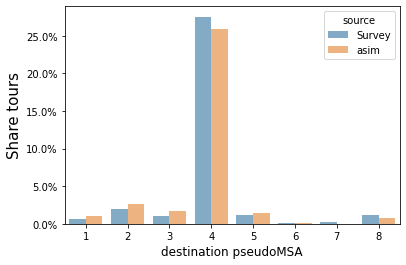

In [37]:
# all_ods.loc[all_ods['source'] == 'Survey'['num_tours_share'] = all_ods['num_tours']/all_ods
g = sns.barplot(
    data=all_ods[all_ods.source.isin(['asim','Survey'])].sort_values('source'), x='dest_pseudomsa', y='num_tours',  hue='source',alpha= 0.6, ci=None)
g.set_ylabel('Share tours', fontsize=15)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.3}%'.format(x*100) ))

g.set_xlabel('destination pseudoMSA', fontsize=12)

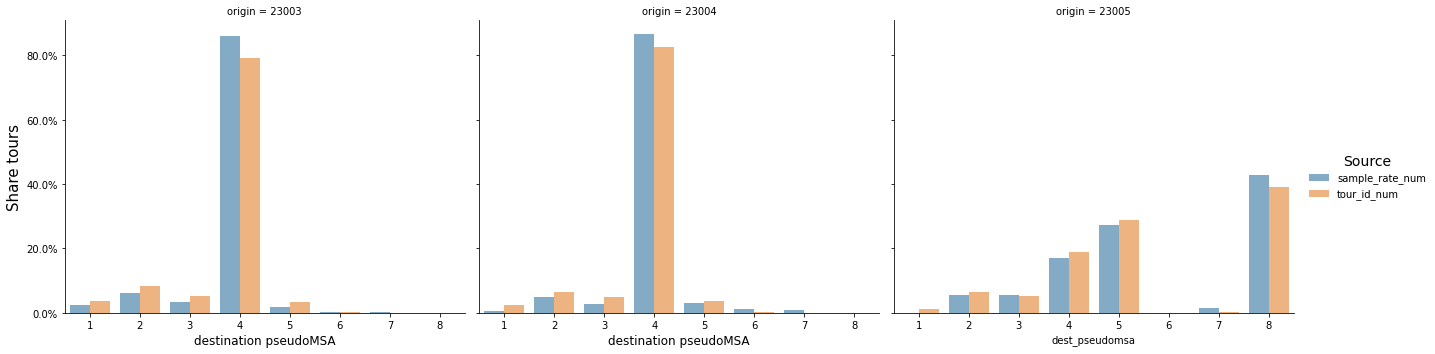

In [38]:
origin_tots = pd.DataFrame()
srclist = ['Survey','asim']
for port in all_ods.origin.unique():
    for i,src in enumerate(['sample_rate_num','tour_id_num']):
        origin_tots = origin_tots.append(pd.Series({'origin':port,
                                            'tot':all_ods[(all_ods['source'] == src) & (all_ods.origin == port)].num_tours.sum(),
                                            'source':src}),
                                           ignore_index = True)
all_ods = all_ods[~all_ods.source.isin(['asim','Survey'])].merge(origin_tots, how = 'left', on = ['origin','source'])
all_ods['num_tours'] = all_ods['num_tours']/all_ods['tot']
g = sns.catplot(
    data=all_ods.sort_values('source'), x='dest_pseudomsa', y='num_tours', hue='source', kind='bar', col='origin',
    aspect=1.2, legend_out=True, alpha=0.6)
g._legend.set_title('Source', prop={'size':14})
# g.fig.get_axes()[0].set_title('asim', fontsize=15)
# g.fig.get_axes()[1].set_title('Survey', fontsize=15)
g.axes[0,0].set_ylabel('Share tours', fontsize=15)
g.axes[0,0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.3}%'.format(x*100) ))

g.axes[0,0].set_xlabel('destination pseudoMSA', fontsize=12)
_ = g.axes[0,1].set_xlabel('destination pseudoMSA', fontsize=12)

In [39]:
od_calib = all_ods[~all_ods.source.isin(['asim','Survey'])].pivot_table(index = ['origin','dest_pseudomsa'], values = 'num_tours',columns = 'source',aggfunc=np.sum)
od_calib
od_calib['fac'] = np.log(od_calib['sample_rate_num']/od_calib['tour_id_num'])
od_calib.to_excel(writer,sheet_name = 'OD_CALIB')
# od_calib

In [40]:
# od_calib.reset_index().groupby('origin')[['sample_rate_num','tour_id_num']].sum()

In [41]:
all_ods_wide = all_ods.pivot(index=['origin','dest_pseudomsa'],columns='source')
all_ods_wide.columns = all_ods_wide.columns.get_level_values(1)
all_ods_wide.reset_index(inplace=True)
all_ods_wide['origin'] = all_ods_wide['origin'].astype(str)
all_ods_wide['dest_pseudomsa'] = all_ods_wide['dest_pseudomsa'].astype(str)

In [42]:
# g = sns.relplot(
#     data=all_ods_wide, x='sample_rate_num', y='tour_id_num', kind='scatter', col='origin', hue='dest_pseudomsa', s=200,alpha=0.5,
# #     facet_kws={'sharex':False, 'sharey':False}
# )
# for ax in g.axes[0]:
#     min_bound = min(ax.get_xlim()[0], ax.get_ylim()[0])
#     max_bound = min(ax.get_xlim()[1], ax.get_ylim()[1])
#     ax.plot([min_bound, max_bound],[min_bound, max_bound], 'k', zorder=0, lw=0.5)

### Tour OD Dist by Tour OD Count Difference

In [43]:
asim_tour_ods = asim_tours.groupby(['origin','dest_taz'])['tour_id'].count().reset_index()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_taz'])['sample_rate'].sum().reset_index()

In [44]:
Survey_tour_ods.rename(columns={'originMGRA': 'origin', 'destinationTAZ': 'dest_taz'}, inplace=True)
all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, on=['origin','dest_taz'], how='outer')
all_ods.rename(columns={'sample_rate':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods['origin'] = all_ods['origin'].astype(str)
all_ods['dest_taz'] = all_ods['dest_taz'].astype(int)

In [45]:
all_ods['origin_taz'] = all_ods['origin'].astype(int).map(maz_to_ext_taz)
all_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][all_ods['origin_taz'] - 1, all_ods['dest_taz'] - 1]
all_ods['dest_taz'] = all_ods['dest_taz'].astype(float)
all_ods['diff'] = all_ods['Survey'] - all_ods['asim']

In [46]:
# fig, ax = plt.subplots(figsize=(10,10))

# g = sns.scatterplot(data=all_ods, x='sov_dist', y='diff',
#                 hue='origin', s=50, palette='Spectral', alpha=0.5, edgecolor='k',linewidth=0.3)
# ax.set_ylabel("# SURVEY - # ASIM")

### Tour Distance by Tour Mode

In [47]:
asim_tours['intra_maz'] = asim_tours['origin'] == asim_tours['destination']
Survey_tours['intra_maz'] = Survey_tours['origin'] == Survey_tours['destination']

In [48]:
with open(r'E:\Projects\Clients\sandag\xborder\Models\Calibration\configs\tecate_dists.csv',"w") as of:
    of.write("taz,dist\n")
    for i,dist in enumerate(skims['SOV_NT_M_DIST__EA'][4]):
        of.write("{},{}\n".format(i+1,dist))
    of.close()

In [49]:
Survey_tours[Survey_tours.poe_id == 2].orig_taz.unique()

array([4], dtype=int64)

In [50]:
asim_uniq_ods = asim_tours[['orig_taz','dest_taz']].drop_duplicates()
asim_uniq_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_ods['orig_taz'].values - 1, asim_uniq_ods['dest_taz'].values - 1]
asim_tours_w_dist = asim_tours.merge(asim_uniq_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])

Survey_uniq_ods = Survey_tours[['orig_taz','dest_taz']].drop_duplicates()
Survey_uniq_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_ods['orig_taz'].values - 1, Survey_uniq_ods['dest_taz'].values - 1]
Survey_tours_w_dist = Survey_tours.merge(Survey_uniq_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_tours_w_dist['origin'] = Survey_tours_w_dist['origin']

In [51]:
asim_tours_w_dist['sample_rate'] = 1

In [52]:
tour_dists = pd.concat((
    asim_tours_w_dist[['sov_dist','source','intra_maz', 'origin', 'tour_mode','sample_rate']],
    Survey_tours_w_dist[['sov_dist','source','intra_maz', 'origin', 'tour_mode','sample_rate']]), ignore_index=True)

In [53]:
# sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', col='tour_mode',col_wrap=2, hue='source',
#         fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,kde=True,
#         facet_kws={'sharex': True, 'sharey': True, 'despine':False})

### Tour Distance by Tour Mode by POE

In [54]:
pd.options.display.float_format = '{:,.1f}'.format
Survey_tours_w_dist['dist_weight'] = Survey_tours_w_dist['sov_dist']*Survey_tours_w_dist['sample_rate']
Survey_tours_w_dist_df = Survey_tours_w_dist.groupby('origin').sum()
Survey_tours_w_dist_df['sov_dist'] = Survey_tours_w_dist_df['dist_weight']/Survey_tours_w_dist_df['sample_rate']
mean_dist_poe = pd.concat([asim_tours_w_dist.groupby('origin')['sov_dist'].mean(),Survey_tours_w_dist_df['sov_dist']], axis = 1)
mean_dist_poe.columns = ['Asim Mean Tour Dist','Survey Mean Tour Dist']
mean_dist_poe.loc['Total'] = [asim_tours_w_dist.sov_dist.mean(), Survey_tours_w_dist['dist_weight'].sum()/Survey_tours_w_dist['sample_rate'].sum()]
mean_dist_poe['Diff'] = mean_dist_poe['Asim Mean Tour Dist'] -mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['Diff']/mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['PCT Diff'].map(lambda x: "{:.1f}%".format(x*100))
print("Average Tour Distance by POE")
mean_dist_poe
#only tens place

Average Tour Distance by POE


,Asim Mean Tour Dist,Survey Mean Tour Dist,Diff,PCT Diff
origin,,,,
23003,8.9,7.4,1.5,20.7%
23004,11.3,11.5,-0.2,-1.6%
23005,21.3,21.4,-0.1,-0.4%
Total,10.0,9.3,0.8,8.1%


In [55]:
Survey_tours_w_dist['dist_weight'] = Survey_tours_w_dist['sov_dist']*Survey_tours_w_dist['sample_rate']
Survey_tours_w_dist_df = Survey_tours_w_dist.groupby('tour_mode').sum()
Survey_tours_w_dist_df['sov_dist'] = Survey_tours_w_dist_df['dist_weight']/Survey_tours_w_dist_df['sample_rate']
mean_dist_poe = pd.concat([asim_tours_w_dist.groupby('tour_mode')['sov_dist'].mean(),Survey_tours_w_dist_df['sov_dist']], axis = 1)
mean_dist_poe.columns = ['Asim Mean Tour Dist','Survey Mean Tour Dist']
mean_dist_poe.loc['Total'] = [asim_tours_w_dist.sov_dist.mean(), Survey_tours_w_dist['dist_weight'].sum()/Survey_tours_w_dist['sample_rate'].sum()]
mean_dist_poe['Diff'] = mean_dist_poe['Asim Mean Tour Dist'] -mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['Diff']/mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['PCT Diff'].map(lambda x: "{:.1f}%".format(x*100))
print("Average Tour Distance by Mode")
mean_dist_poe

Average Tour Distance by Mode


,Asim Mean Tour Dist,Survey Mean Tour Dist,Diff,PCT Diff
tour_mode,,,,
DRIVEALONE,11.7,10.8,0.8,7.6%
SHARED2,10.4,9.6,0.8,8.2%
SHARED3,10.0,9.3,0.6,6.6%
WALK,8.6,7.9,0.7,9.2%
Total,10.0,9.3,0.8,8.1%


In [56]:
Survey_tours_w_dist['dist_weight'] = Survey_tours_w_dist['sov_dist']*Survey_tours_w_dist['sample_rate']
Survey_tours_w_dist_df = Survey_tours_w_dist.groupby('tour_type').sum()
Survey_tours_w_dist_df['sov_dist'] = Survey_tours_w_dist_df['dist_weight']/Survey_tours_w_dist_df['sample_rate']
mean_dist_poe = pd.concat([asim_tours_w_dist.groupby('tour_type')['sov_dist'].mean(),Survey_tours_w_dist_df['sov_dist']], axis = 1)
mean_dist_poe.columns = ['Asim Mean Tour Dist','Survey Mean Tour Dist']
mean_dist_poe.loc['Total'] = [asim_tours_w_dist.sov_dist.mean(), Survey_tours_w_dist['dist_weight'].sum()/Survey_tours_w_dist['sample_rate'].sum()]
mean_dist_poe['Diff'] = mean_dist_poe['Asim Mean Tour Dist'] -mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['Diff']/mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['PCT Diff'].map(lambda x: "{:.1f}%".format(x*100))
print("Average Tour Distance by Purpose")
mean_dist_poe

Average Tour Distance by Purpose


,Asim Mean Tour Dist,Survey Mean Tour Dist,Diff,PCT Diff
tour_type,,,,
other,14.6,9.1,5.6,61.5%
school,13.1,12.9,0.2,1.4%
shop,7.9,7.7,0.2,2.9%
visit,14.6,17.0,-2.4,-14.4%
work,13.7,13.3,0.3,2.3%
Total,10.0,9.3,0.8,8.1%


In [57]:
# short_walk_survey = Survey_tours_w_dist[(Survey_tours_w_dist.sov_dist < 5) & (Survey_tours_w_dist.tour_mode == 'WALK')]
# short_walk_survey['source'] = 'Survey'
# short_walk_asim = asim_tours_w_dist[(asim_tours_w_dist['sov_dist']<5) & (asim_tours_w_dist.tour_mode == 'WALK')]
# short_walk_asim['source'] = 'asim'

# short_walk = short_walk_survey.append(short_walk_asim, ignore_index = True)
# print("Walk Tours < 5 mi by POE")
# sns.displot(
#         data=short_walk[['source','sov_dist','poe_id','sample_rate']].sort_values('source'), x='sov_dist', hue='source',
#         kind='kde', fill=True, aspect=1.5, common_norm=False,weights =short_walk.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True,  'despine':False, 'margin_titles':True})

In [58]:
# short_walk_survey = Survey_tours_w_dist[(Survey_tours_w_dist.sov_dist < 5) & (Survey_tours_w_dist.tour_mode == 'WALK')]
# short_walk_survey['source'] = 'Survey'
# short_walk_asim = asim_tours_w_dist[(asim_tours_w_dist['sov_dist']<5) & (asim_tours_w_dist.tour_mode == 'WALK')]
# short_walk_asim['source'] = 'asim'

# short_walk = short_walk_survey.append(short_walk_asim, ignore_index = True)
# sns.displot(
#         data=short_walk[['source','sov_dist','poe_id','sample_rate']].sort_values('source'), x='sov_dist', hue='source',
#         kind='hist',kde = True, fill=True, aspect=1.5, common_norm=False,weights =short_walk.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True,  'despine':False, 'margin_titles':True})

In [59]:
# short_walk_survey = Survey_tours_w_dist[(Survey_tours_w_dist.sov_dist < 5) & (Survey_tours_w_dist.tour_mode == 'WALK')]
# short_walk_survey['source'] = 'Survey'
# short_walk_asim = asim_tours_w_dist[(asim_tours_w_dist['sov_dist']<5) & (asim_tours_w_dist.tour_mode == 'WALK')]
# short_walk_asim['source'] = 'asim'

# short_walk = short_walk_survey.append(short_walk_asim, ignore_index = True)
# print("Walk Tours < 5 mi by POE")
# sns.displot(
#         data=short_walk[['source','sov_dist','poe_id','sample_rate']].sort_values('source'),row = 'poe_id', x='sov_dist', hue='source',
#         kind='kde', fill=True, aspect=1.5, common_norm=False,weights =short_walk.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True,  'despine':False, 'margin_titles':True})

In [60]:
# print("Walk tours < 5mi \nSurvey: {:,.0f}, (records: {:,.0f})\nAsim:  {:,.0f}".format(short_walk[short_walk.source == 'Survey'].sample_rate.sum(),short_walk[short_walk.source == 'Survey'].sample_rate.count(),len(short_walk[short_walk.source == 'asim'])))

In [61]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', hue='source',
#         kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True,  'despine':False, 'margin_titles':True})

## Tour Distances

In [62]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', row='tour_mode',hue='source',
#         kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})

In [63]:
tour_dists

,sov_dist,source,intra_maz,origin,tour_mode,sample_rate
0,3.3,asim,False,23004,SHARED2,1.0
1,3.3,asim,False,23004,WALK,1.0
2,3.3,asim,False,23004,WALK,1.0
3,3.3,asim,False,23004,WALK,1.0
4,3.3,asim,False,23004,WALK,1.0
...,...,...,...,...,...,...
115803,40.0,Survey,False,23005,DRIVEALONE,38.1
115804,35.4,Survey,False,23005,WALK,18.0
115805,6.7,Survey,False,23005,DRIVEALONE,38.1
115806,35.8,Survey,False,23005,DRIVEALONE,38.1


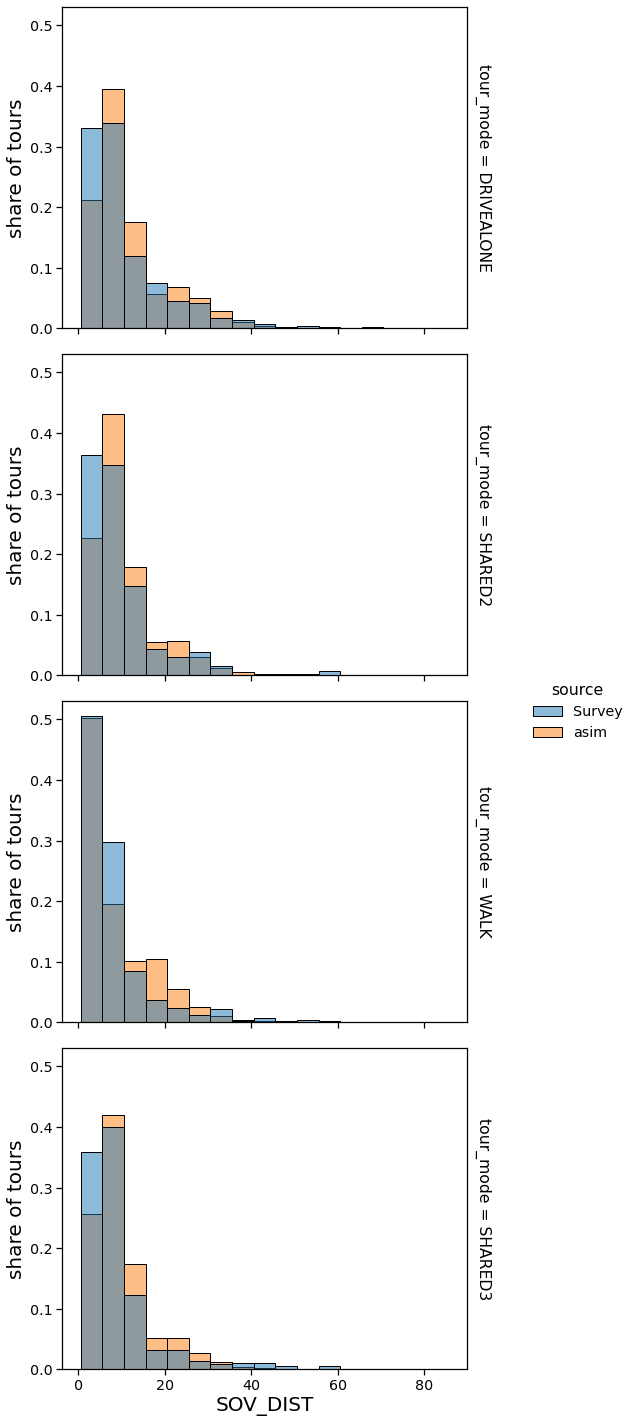

In [64]:
for src in ['asim','Survey']:
    for mode in tour_dists.tour_mode.unique():
        tour_dists.loc[(tour_dists.source == src) &(tour_dists.tour_mode == mode) ,'sample_rate_mode'] = tour_dists[(tour_dists.source == src) &(tour_dists.tour_mode == mode)].sample_rate/tour_dists[(tour_dists.source == src) &(tour_dists.tour_mode == mode)].sample_rate.sum()

with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', row='tour_mode',hue='source',
        kind='hist', binwidth = 5,fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate_mode,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})
    g.set_axis_labels("SOV_DIST", "share of tours", fontsize=20)

In [65]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', col='origin',row='tour_mode',hue='source',
#         kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
#         facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True}).set(xlim =0)

In [66]:
# with sns.plotting_context("notebook",font_scale=1.1):
#     sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', col='intra_maz',hue='source', kind='kde', fill=True, aspect=1.5,
#         facet_kws={'sharex': False, 'sharey': False}, weights =tour_dists.sort_values('source').sample_rate, common_norm=False).set(xlim =0)

In [67]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     sns.displot(
#         data=tour_dists.sort_values('source'), x='sov_dist', col='intra_maz', row='origin', hue='source', kind='kde',fill =True,aspect=2,
#         facet_kws={'sharex': False, 'sharey': False},weights =tour_dists.sort_values('source').sample_rate,   common_norm=False)

## Tour Mode Choice

Text(0.5, 0, 'tour mode')

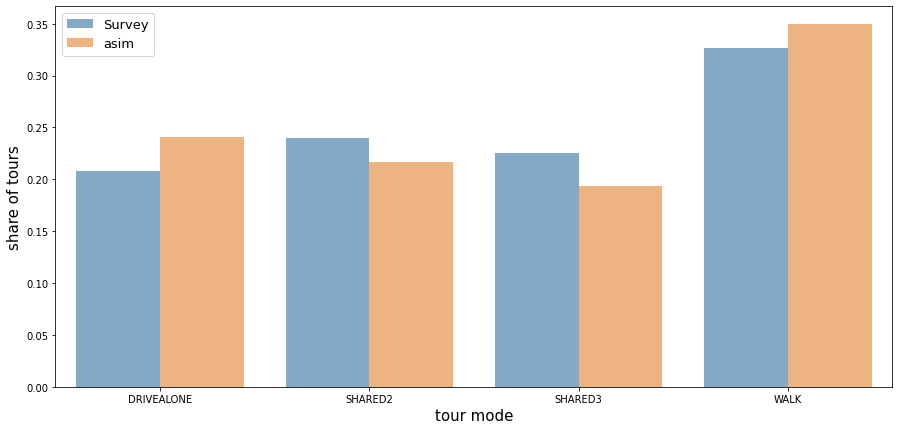

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
tour_mode = asim_tours.groupby('tour_mode')[['tour_id']].count()
tour_mode['tour_id'] = tour_mode['tour_id']/tour_mode['tour_id'].sum()
tour_mode_survey = Survey_tours.groupby('tour_mode')[['sample_rate']].sum()
tour_mode_survey['sample_rate'] = tour_mode_survey['sample_rate']/tour_mode_survey['sample_rate'].sum()
tour_mode = pd.merge(tour_mode,tour_mode_survey , left_index=True, right_index=True).reset_index()
tour_mode.columns = ['tour_mode','asim','Survey']
tour_mode = tour_mode.melt(id_vars='tour_mode',var_name='source',value_name='num_tours')
sns.barplot(
    data=tour_mode.sort_values('source'), x='tour_mode', y='num_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],
    hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('share of tours', fontsize=15)
ax.set_xlabel('tour mode', fontsize=15)

In [69]:
tour_mode = asim_tours.groupby(['tour_mode','poe_id'])['tour_id'].count().reset_index()
tour_mode = pd.merge(
    tour_mode, Survey_tours.groupby(['tour_mode','poe_id'])['sample_rate'].sum().reset_index(),
    left_on=['tour_mode','poe_id'], right_on=['tour_mode','poe_id'])

In [70]:
tour_mode.columns = ['tour_mode','poe_id','asim','Survey']
tour_mode = tour_mode.melt(id_vars=['tour_mode','poe_id'],var_name='source',value_name='num_tours')

In [71]:
tour_mode_tot = tour_mode.groupby('source',as_index = False)[['num_tours']].sum().rename(columns = {'num_tours':'tot'})
tour_mode = tour_mode.merge(tour_mode_tot)
tour_mode['share_tours'] = tour_mode['num_tours']/tour_mode['tot']

### Tour Mode by POE

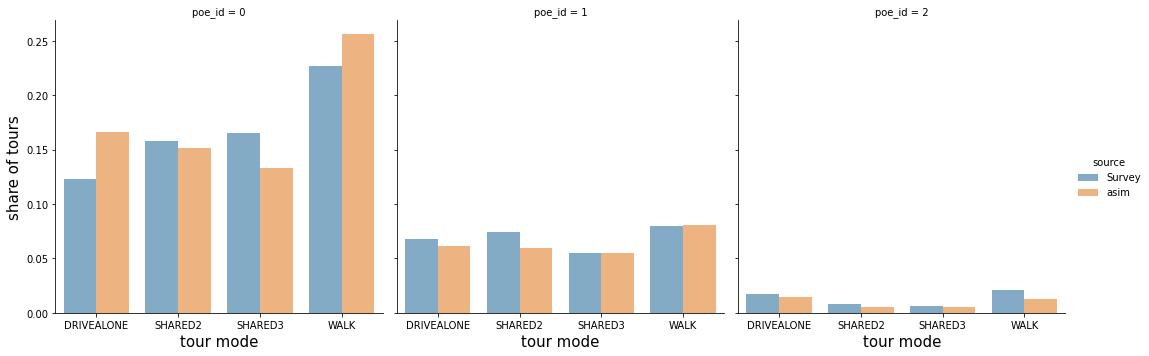

In [72]:
g = sns.catplot(
    data=tour_mode.sort_values('source'), x='tour_mode', y='share_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],kind='bar',col='poe_id',
    hue='source', alpha=0.6, sharey=True)
for i, ax in enumerate(g.axes[0]):
    if i == 0:
        ax.set_ylabel('share of tours', fontsize=15)
    ax.set_xlabel('tour mode', fontsize=15)

In [73]:
poe_id_tots = pd.DataFrame()
srclist = ['Survey','asim']
for port in tour_mode.poe_id.unique():
    for i,src in enumerate(['asim','Survey']):
        poe_id_tots = poe_id_tots.append(pd.Series({'poe_id':port,
                                            'tot':tour_mode[(tour_mode['source'] == src) & (tour_mode.poe_id == port)].num_tours.sum(),
                                            'source':src}),
                                           ignore_index = True)
tour_mode = tour_mode.drop('tot',axis =1).merge(poe_id_tots, how = 'left', on = ['poe_id','source'])
tour_mode['num_tours'] = tour_mode['num_tours']/tour_mode['tot']


In [74]:
poe_mode_calib = tour_mode.groupby(['source','poe_id','tour_mode'],as_index = False)[['num_tours']].sum().pivot(index = ['poe_id','tour_mode'],columns = 'source', values = 'num_tours')
poe_mode_calib['fac'] = np.log(poe_mode_calib['Survey']/poe_mode_calib['asim'])
poe_mode_calib.to_excel(writer, sheet_name = 'POE_MODE_CALIB')

In [75]:
tour_mode = asim_tours.groupby(['tour_mode','tour_type'])['tour_id'].count().reset_index()
tour_mode['num_asim'] = tour_mode['tour_id']
tour_mode['tour_id'] = tour_mode['tour_id']/tour_mode['tour_id'].sum()
survey_mode = Survey_tours.groupby(['tour_mode','tour_type'])['sample_rate'].sum().reset_index()
survey_mode['num_survey'] = survey_mode['sample_rate']
survey_mode['sample_rate'] = survey_mode['sample_rate']/survey_mode['sample_rate'].sum()
tour_mode = pd.merge(
    tour_mode, survey_mode,
    on=['tour_mode','tour_type'])
tour_mode.columns = ['tour_mode','tour_type','asim','num_asim','Survey','num_survey']
tour_mode = tour_mode.melt(id_vars=['tour_mode','tour_type'],var_name='source',value_name='num_tours')

### Tour Mode by Tour Purpose

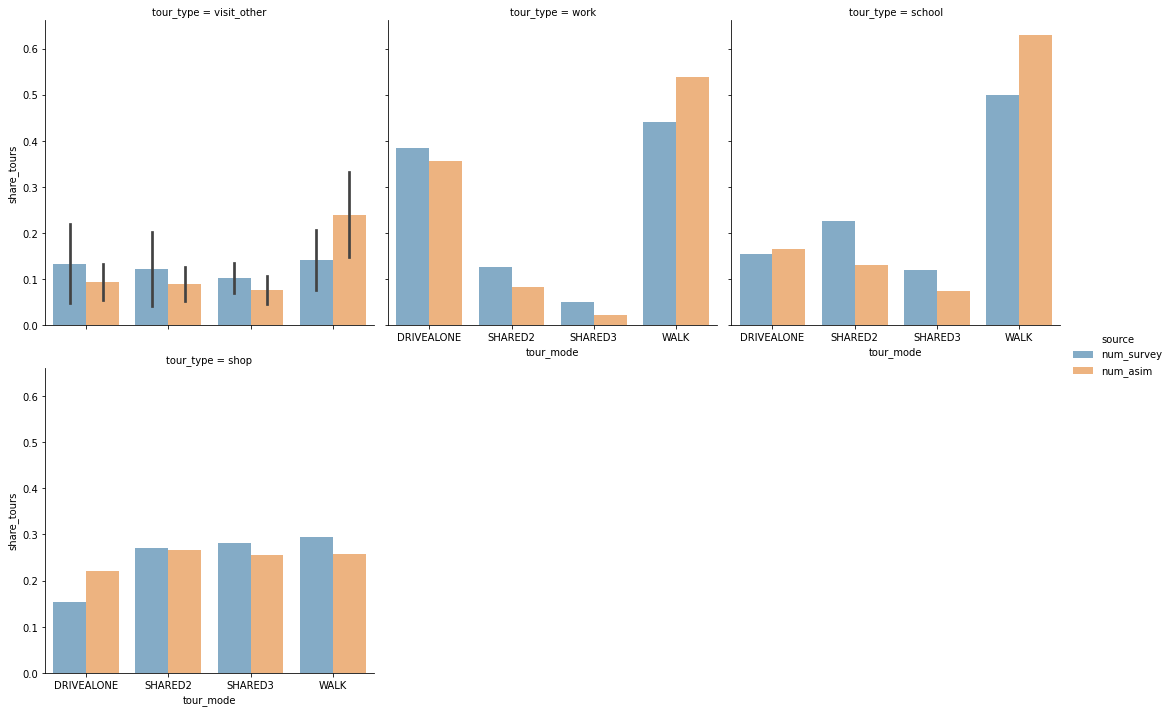

In [76]:
tour_mode.loc[tour_mode.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'

origin_tots = pd.DataFrame()
for port in tour_mode.tour_type.unique():
    for i,src in enumerate(['num_survey','num_asim']):
        origin_tots = origin_tots.append(pd.Series({'tour_type':port,
                                            'tot':tour_mode[(tour_mode['source'] == src) & (tour_mode.tour_type == port)].num_tours.sum(),
                                            'source':src}),
                                           ignore_index = True)

tour_mode = tour_mode[~tour_mode.source.isin(['asim','Survey'])].merge(origin_tots, how = 'left', on = ['tour_type','source'])
tour_mode['share_tours'] = tour_mode['num_tours']/tour_mode['tot']
g = sns.catplot(
    data=tour_mode.sort_values('source',ascending = False), x='tour_mode', y='share_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],kind='bar',
    col='tour_type', col_wrap=3,hue='source', alpha=0.6, sharey=True)

In [77]:
purp_calib = tour_mode.groupby(['tour_type','source','tour_mode'],as_index = False)[['share_tours']].sum()
# purp_calib.loc[purp_calib.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'
purp_calib = purp_calib.pivot_table(index = ['tour_type','tour_mode'],
                                                                              values = 'share_tours',
                                                                              columns = 'source')
purp_calib['fac'] = np.log(purp_calib['num_survey']/purp_calib['num_asim'])
purp_calib.to_excel(writer,sheet_name = 'PURP_CALIB')
# writer.save()
# purp_calib

In [78]:
# purp_calib.reset_index().groupby('tour_type')[['num_asim','num_survey']].sum()

## Stop Frequency

In [79]:
asim_tpt = asim_trips.groupby(['tour_id'])['trip_id'].count().value_counts().reset_index()
asim_tpt.columns = ['# trips', '# tours']
asim_tpt['share tours'] = asim_tpt['# tours'] / asim_tpt['# tours'].sum()
# asim_tpt['# trips'] = asim_tpt['# trips'] / 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'] * 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'].value_counts()
asim_tpt['source'] = 'asim'

In [80]:
Survey_tpt = Survey_trips.groupby(['tour_id']).agg({'trip_id':'count','sample_rate':'first'}).groupby('trip_id').sum().reset_index()
Survey_tpt.columns = ['# trips', '# tours']
Survey_tpt['share tours'] = Survey_tpt['# tours'] / Survey_tpt['# tours'].sum()
Survey_tpt['source'] = 'Survey'

In [81]:
all_tpt = pd.concat([asim_tpt,Survey_tpt])

Text(0.5, 0, 'trips per tour')

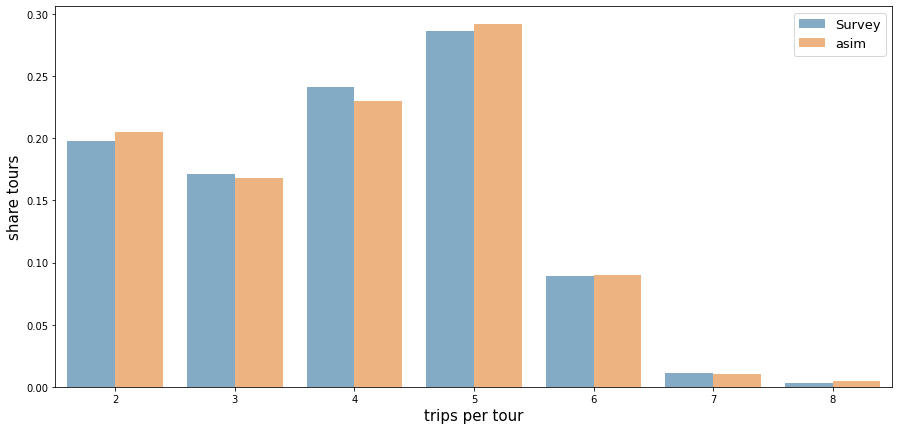

In [82]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=all_tpt.sort_values('source'), x='# trips', y='share tours', hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('share tours', fontsize=15)
ax.set_xlabel('trips per tour', fontsize=15)

## Trip Purpose 

In [83]:
asim_purp = asim_trips.groupby(['purpose'])[['trip_id']].count().reset_index()
asim_purp['trip_id'] = asim_purp['trip_id']/asim_purp['trip_id'].sum()
asim_purp.columns = ['purpose', 'share of trips']
asim_purp['source'] = 'asim'

In [84]:
Survey_purp = Survey_trips.groupby(['purpose'])[['sample_rate']].sum().reset_index()
Survey_purp['sample_rate'] = Survey_purp['sample_rate']/Survey_purp['sample_rate'].sum()
Survey_purp.columns = ['purpose', 'share of trips']
Survey_purp['source'] = 'Survey'

In [85]:
all_purp = pd.concat([asim_purp, Survey_purp])

Text(0.5, 0, 'trip purpose')

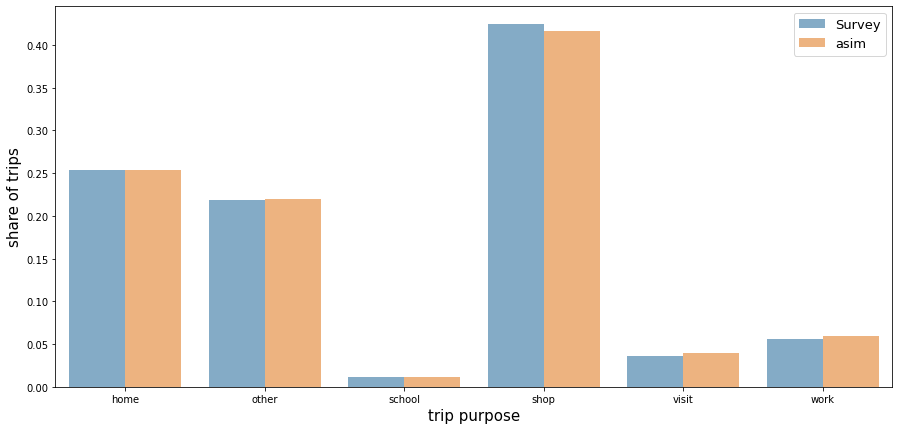

In [86]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=all_purp.sort_values('source'), x='purpose', y='share of trips', hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('share of trips', fontsize=15)
ax.set_xlabel('trip purpose', fontsize=15)

### Trips per Tour by Trip Purpose 

In [87]:
asim_tpt = asim_trips.groupby(['tour_id', 'purpose'])['trip_id'].count().reset_index()
asim_tpt.rename(columns={'trip_id': 'trips per tour', 'tour_id': '# tours', 'purpose': 'trip purpose'}, inplace=True)
asim_tpt['# tours'] = asim_tpt['# tours']/asim_tpt['# tours'].sum()
asim_tpt = asim_tpt.groupby(['trip purpose', 'trips per tour']).sum().reset_index()
# asim_tpt['trips per tour'] = asim_tpt['trips per tour'] / 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'] * 59 #adjust for scaling
asim_tpt['source'] = 'asim'

In [88]:
Survey_tpt = Survey_trips.groupby(['tour_id', 'purpose']).agg({'sample_rate':'first','trip_id':'count'}).reset_index()
Survey_tpt.rename(columns={'trip_id': 'trips per tour', 'sample_rate': '# tours', 'purpose': 'trip purpose'}, inplace=True)
Survey_tpt['# tours'] = Survey_tpt['# tours']/Survey_tpt['# tours'].sum()
Survey_tpt = Survey_tpt.groupby(['trip purpose', 'trips per tour']).sum().reset_index()
Survey_tpt['source'] = 'Survey'

In [89]:
all_tpt = pd.concat([asim_tpt, Survey_tpt])

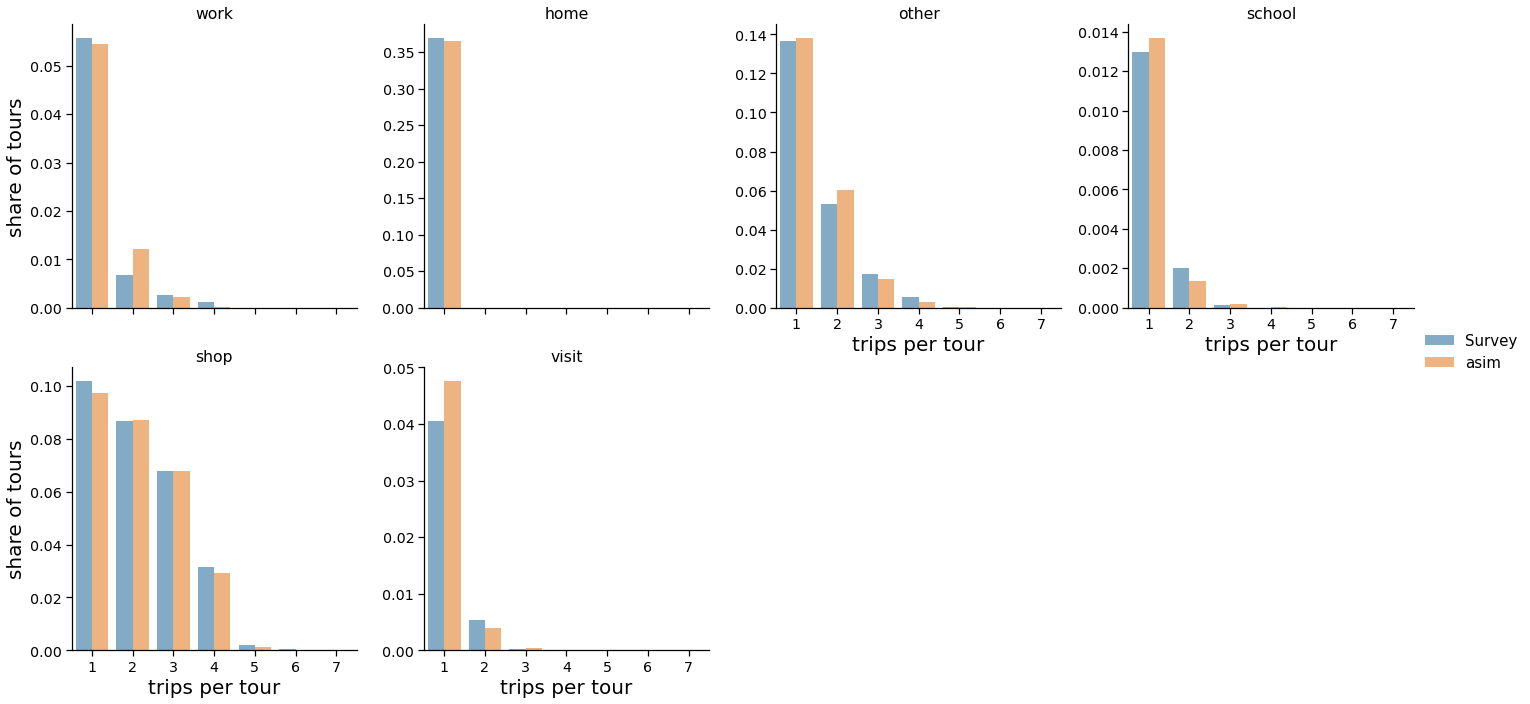

In [90]:
with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.catplot(
        data=all_tpt.sort_values('source'), x='trips per tour', y='# tours', kind='bar', hue='source', col='trip purpose',
        col_wrap=4, sharey=False, alpha=0.6)
    g._legend.set_title('')
    plt.setp(g._legend.get_texts(), fontsize=15)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("trips per tour", "share of tours", fontsize=20)

## Trip Scheduling 

In [91]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.histplot(data=Survey_tours, x='start',weights=Survey_tours.sample_rate, ax=ax,binwidth = 1, label='Survey', alpha=0.4, lw=3, kde = True)
# sns.histplot(data=asim_tours,  x='start', weights=[1 for i in range(len(asim_tours))], binwidth =1,ax=ax, label='asim', color = 'orange',alpha=0.4,kde = True, lw=3)
# ax.legend(fontsize=13)
# ax.set_ylabel('density', fontsize=13)
# ax.set_xlabel('tour departure hour', fontsize=15)
# ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm'])

[Text(0.0, 0, '3am'),
 Text(5.0, 0, '5am'),
 Text(10.0, 0, '7:30am'),
 Text(15.0, 0, '10am'),
 Text(20.0, 0, '12:30pm'),
 Text(25.0, 0, '3pm'),
 Text(30.0, 0, '5:30pm'),
 Text(35.0, 0, '8pm'),
 Text(40.0, 0, '10:30pm'),
 Text(45.0, 0, '')]

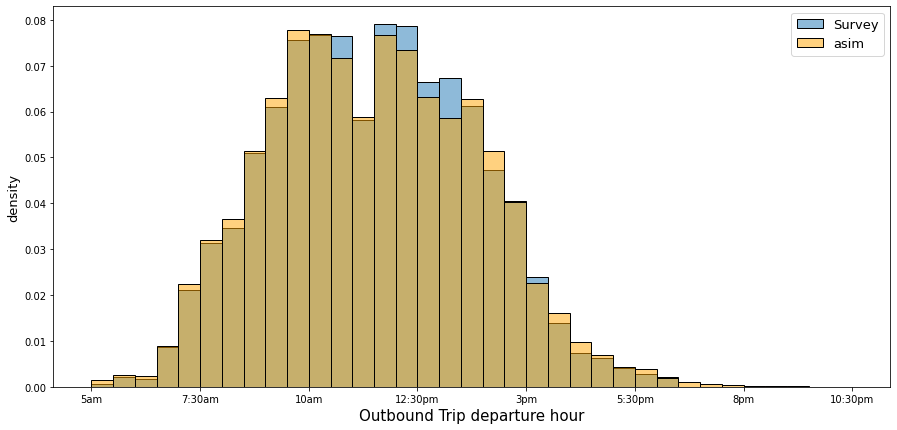

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
Survey_trips_out = Survey_trips[Survey_trips.outbound]
Survey_trips_out['sample_rate_share'] = Survey_trips_out['sample_rate']/Survey_trips_out['sample_rate'].sum()
asim_trips_out = asim_trips[asim_trips.outbound]
asim_trips_out['share'] = 1/len(asim_trips_out)
sns.histplot(data=Survey_trips_out, weights=Survey_trips_out.sample_rate_share,x='depart',binwidth = 1, ax=ax, label='Survey', alpha=0.5,)
sns.histplot(data=asim_trips_out, x='depart',weights=asim_trips_out.share, ax=ax, label='asim',binwidth = 1, 
             alpha=0.5, color = 'orange')
ax.legend(fontsize=13)
ax.set_ylabel('density', fontsize=13)
ax.set_xlabel('Outbound Trip departure hour', fontsize=15)
# ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm'])
ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm','8pm','10:30pm'])

[Text(0.0, 0, '3am'),
 Text(5.0, 0, '5am'),
 Text(10.0, 0, '7:30am'),
 Text(15.0, 0, '10am'),
 Text(20.0, 0, '12:30pm'),
 Text(25.0, 0, '3pm'),
 Text(30.0, 0, '5:30pm'),
 Text(35.0, 0, '8pm'),
 Text(40.0, 0, '10:30pm'),
 Text(45.0, 0, '')]

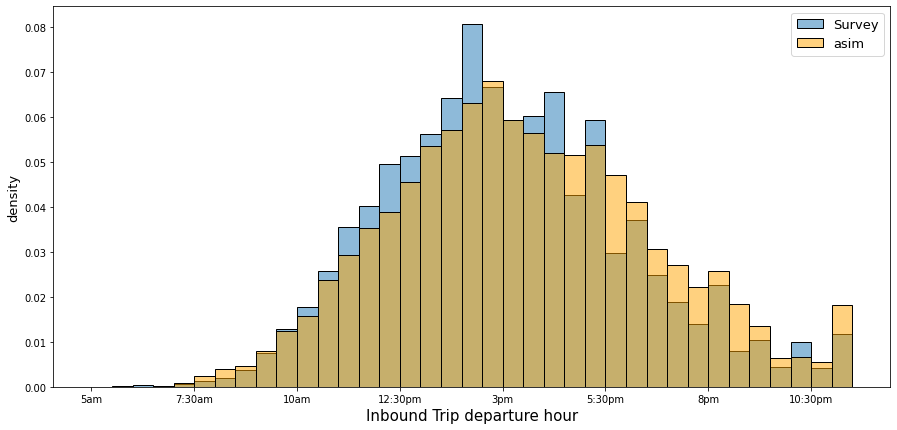

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
Survey_trips_out = Survey_trips[~Survey_trips.outbound]
Survey_trips_out['sample_rate_share'] = Survey_trips_out['sample_rate']/Survey_trips_out['sample_rate'].sum()
asim_trips_out = asim_trips[~asim_trips.outbound]
asim_trips_out['share'] = 1/len(asim_trips_out)
sns.histplot(data=Survey_trips_out, weights=Survey_trips_out.sample_rate_share,x='depart',binwidth = 1, ax=ax, label='Survey', alpha=0.5,)
sns.histplot(data=asim_trips_out, x='depart',weights=asim_trips_out.share, ax=ax, label='asim',binwidth = 1, 
             alpha=0.5, color = 'orange')
ax.legend(fontsize=13)
ax.set_ylabel('density', fontsize=13)
ax.set_xlabel('Inbound Trip departure hour', fontsize=15)
# ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm'])
ax.set_xticklabels(['3am','5am','7:30am','10am','12:30pm','3pm','5:30pm','8pm','10:30pm'])

In [94]:
# fig, axarr = plt.subplots(figsize=(15,7), nrows=2, sharex=True)
# sns.kdeplot(data=Survey_trips[(Survey_trips['outbound']) & (Survey_trips['trip_num'] == 4)], x='depart', ax=axarr[0], label='Survey', alpha=0.5, shade=True)
# sns.kdeplot(data=asim_trips[(asim_trips['outbound']) & (asim_trips['trip_num'] == 4)], x='depart', ax=axarr[0], label='asim', alpha=0.5, shade=True)
# axarr[0].legend(fontsize=13)
# axarr[0].set_ylabel('density', fontsize=13)
# axarr[0].set_xlabel('')
# axarr[0].set_title('outbound', fontsize=15, loc='right')
# axarr[1].set_title('inbound', fontsize=15, loc='right')
# sns.kdeplot(data=Survey_trips[~(Survey_trips['outbound']) & (Survey_trips['trip_num'] == 4)], x='depart',weights=Survey_trips[~Survey_trips['outbound']].sample_rate, ax=axarr[1], label='Survey', alpha=0.5, shade=True)
# sns.kdeplot(data=asim_trips[~(asim_trips['outbound']) & (asim_trips['trip_num'] == 4)], x='depart', ax=axarr[1], label='asim', alpha=0.5, shade=True)
# axarr[1].legend(fontsize=13)
# axarr[1].set_ylabel('density', fontsize=13)
# axarr[1].set_xlabel('trip departure hour', fontsize=13)

<!-- ## Trip Destination  -->

In [95]:
asim_trips['dest_pseudomsa'] = asim_trips['destination'].map(mazs['pseudomsa'])
asim_trips['orig_pseudomsa'] = asim_trips['origin'].map(mazs['pseudomsa'])
Survey_trips['dest_pseudomsa'] = Survey_trips['destination'].map(mazs['pseudomsa'])
Survey_trips['orig_pseudomsa'] = Survey_trips['origin'].map(mazs['pseudomsa'])

In [96]:
asim_trip_ods = asim_trips.groupby(['orig_pseudomsa','dest_pseudomsa'])['trip_id'].count().reset_index()
asim_trip_ods.columns=['origin pMSA', 'destination pMSA', '# trips']
asim_trip_ods = asim_trip_ods.pivot(index='origin pMSA', columns='destination pMSA',values='# trips')
Survey_trip_ods = Survey_trips.groupby(['orig_pseudomsa','dest_pseudomsa'])['sample_rate'].sum().reset_index()
Survey_trip_ods.columns=['origin pMSA', 'destination pMSA', '# trips']
Survey_trip_ods = Survey_trip_ods.pivot(index='origin pMSA', columns='destination pMSA',values='# trips')

In [97]:
# from matplotlib.colors import LogNorm

# fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
# vmin = min(asim_trip_ods.min().min(), Survey_trip_ods.min().min())
# vmax = min(asim_trip_ods.max().max(), Survey_trip_ods.max().max())

# sns.heatmap(
#     asim_trip_ods, ax=ax[0], cmap="YlGnBu", cbar=True,
#     vmin=vmin, vmax=vmax,
# #     norm=LogNorm()
# )
# g = sns.heatmap(
#     Survey_trip_ods, ax=ax[1],cmap="YlGnBu", cbar=True,
#     vmin=vmin, vmax=vmax,
# #     norm=LogNorm()
# )
# ax[0].set_title('asim', fontsize=15)
# ax[0].set_ylabel('origin pseudo-MSA', fontsize=13)
# ax[0].set_xlabel('destination pseudo-MSA', fontsize=13)
# ax[1].set_title('Survey', fontsize=15)
# ax[1].set_ylabel('')
# ax[1].set_xlabel('destination pseudo-MSA', fontsize=13)
# fig.suptitle('Trip OD Counts', fontsize=16)

In [98]:
asim_trip_dest_tazs = asim_trips[asim_trips['trip_num'] != asim_trips['trip_count']].groupby('dest_taz')['trip_id'].count().reset_index()
asim_trip_dest_tazs.rename(columns={'trip_id':'asim_count'}, inplace=True)

Survey_trip_dest_tazs = Survey_trips[Survey_trips['trip_num'] != Survey_trips['trip_count']].groupby('dest_taz')['sample_rate'].sum().reset_index()
Survey_trip_dest_tazs.rename(columns={'sample_rate':'Survey_count', 'dest_taz':'dest_taz'}, inplace=True)

trip_dest_tazs = pd.merge(asim_trip_dest_tazs, Survey_trip_dest_tazs, left_on='dest_taz',right_on='dest_taz', how='outer').fillna(0)

In [99]:
# fig, ax = plt.subplots(figsize=(8,8))
# g = sns.scatterplot(data=trip_dest_tazs, x='asim_count', y='Survey_count',ax=ax, marker='.',alpha=0.3, s=250)
# min_bound = min(ax.get_xlim()[0], ax.get_ylim()[0])
# max_bound = min(ax.get_xlim()[1], ax.get_ylim()[1])
# ax.plot([min_bound, max_bound], [min_bound, max_bound], linewidth=1, alpha=0.7, c='k', zorder=0)
# ax.set_title('Trip Destination TAZ Counts (trip != last trip of leg)', fontsize=15)
# ax.set_xlim(min_bound, max_bound)
# ax.set_ylim(min_bound, max_bound)
# ax.set_xlabel('asim',fontsize=13)
# ax.set_ylabel('Survey', fontsize=13)

<!-- ### Trip Distance -->

In [100]:
asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]

Survey_uniq_trip_ods = Survey_trips[['orig_taz', 'dest_taz']].drop_duplicates()
Survey_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_trip_ods['orig_taz'].values - 1, Survey_uniq_trip_ods['dest_taz'].values - 1]

asim_trips_w_dist = asim_trips.merge(asim_uniq_trip_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_trips_w_dist = Survey_trips.merge(Survey_uniq_trip_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])

In [101]:
asim_disc_mask = asim_trips_w_dist['trip_num'].between(1, asim_trips_w_dist['trip_count'], inclusive=False)
asim_disc_trips = asim_trips_w_dist[asim_disc_mask]

In [102]:
Survey_disc_mask = Survey_trips_w_dist['trip_num'].between(1, Survey_trips_w_dist['trip_count'], inclusive=False)
Survey_disc_trips = Survey_trips_w_dist[Survey_disc_mask]

In [103]:

# fig, ax = plt.subplots(figsize=(15,5))
# Survey_trips_w_dist['sample_rate_share'] = Survey_trips_w_dist['sample_rate']/Survey_trips_w_dist['sample_rate'].sum()
# asim_trips_w_dist['share'] = 1/len(asim_trips_w_dist)
# sns.histplot(x=np.array(Survey_trips_w_dist['sov_dist']), binwidth = 5,
#              label='Survey', 
#              weights = np.array(Survey_trips_w_dist['sample_rate_share']),    ax=ax)
# sns.histplot(x=asim_trips_w_dist['sov_dist'], label='asim', binwidth = 5,weights = np.array(asim_trips_w_dist.share)ax=ax, color = 'orange')
# ax.legend()
# ax.set_xlabel('SOV distance (TAZ-TAZ)', fontsize=13)
# ax.set_title('Trip Distance (all trips)', fontsize=15)

In [104]:
# fig, ax = plt.subplots(figsize=(15,5))
# sns.kdeplot(Survey_disc_trips['sov_dist'], weights=Survey_disc_trips.sample_rate,label='Survey', ax=ax, fill=True)
# sns.kdeplot(asim_disc_trips['sov_dist'], label='asim', ax=ax, fill=True)
# ax.legend()
# ax.set_xlabel('SOV distance (TAZ-TAZ)', fontsize=13)
# ax.set_title('Trip Distance (non-tour-OD trips)', fontsize=15)

In [105]:
# print("Out-direction distance = dist_ik + dist_kj - dist_ij where: dist_ik = distance from last known origin to stop location dist_kj = distance from stop location to primary destination (outbound stops) or tour origin (inbound stops) dist_ij = distance from tour origin to tour primary destination (outbound stops) or from tour primary destination to tour origin (inbound stops). \nFor first stop in outbound direction, last known location is tour origin. \nFor subsequent stops, it is location of last stop in order from origin to primary destination. \nFor first stop in inbound direction, last known location is tour primary destination. \nFor subsequent stops it is location of last stop in order from primary destination to origin.")

<!-- ### Trip Out of Direction Distance -->

In [106]:
asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]

Survey_uniq_trip_ods = Survey_trips[['orig_taz', 'dest_taz']].drop_duplicates()
Survey_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_trip_ods['orig_taz'].values - 1, Survey_uniq_trip_ods['dest_taz'].values - 1]

asim_trips_w_dist = asim_trips.merge(asim_uniq_trip_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_trips_w_dist = Survey_trips.merge(Survey_uniq_trip_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])

In [107]:
Survey_trips_w_dist['outtrips'] = Survey_trips_w_dist.stop_frequency.map(lambda x: int(x[0]))
Survey_trips_w_dist['intrips'] = Survey_trips_w_dist.stop_frequency.map(lambda x: int(x.split('_')[1][0]))
Survey_trips_w_dist['outbound'] = 0
Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_tours[['tour_id','orig_taz','dest_taz']], how = 'left', on = 'tour_id',suffixes = ['','_tour'])
Survey_trips_w_dist.loc[Survey_trips_w_dist.trip_count -1 == Survey_trips_w_dist['outtrips'], 'outbound'] = 1

Survey_uniq_ods['tour_sov_dist_inbound'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_ods['dest_taz'].values - 1, Survey_uniq_ods['orig_taz'].values - 1]

Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_uniq_ods[['orig_taz','dest_taz','sov_dist','tour_sov_dist_inbound']].rename(columns = {'sov_dist':'tour_sov_dist','dest_taz':'dest_taz_tour','orig_taz':'orig_taz_tour'}), how = 'left',on=['orig_taz_tour', 'dest_taz_tour'])

# asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
# asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]



Survey_trips_uniq_outkj = Survey_trips_w_dist[['dest_taz','dest_taz_tour',]].drop_duplicates()
Survey_trips_uniq_inkj = Survey_trips_w_dist[['dest_taz','orig_taz_tour']].drop_duplicates()

Survey_trips_uniq_outkj['outbound_kj'] = skims['SOV_NT_M_DIST__EA'][Survey_trips_uniq_outkj['dest_taz'].values - 1, Survey_trips_uniq_outkj['dest_taz_tour'].values - 1]
Survey_trips_uniq_inkj['inbound_kj'] = skims['SOV_NT_M_DIST__EA'][Survey_trips_uniq_inkj['dest_taz'].values - 1, Survey_trips_uniq_inkj['orig_taz_tour'].values - 1]
Survey_trips_uniq_outkj['outbound'] = 1
Survey_trips_uniq_inkj['outbound'] = 0

Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_trips_uniq_outkj, how = 'left', on = ['dest_taz','dest_taz_tour','outbound'])
Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_trips_uniq_inkj, how = 'left', on = ['dest_taz','orig_taz_tour','outbound'])

Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1 , 'outdirection'] = Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['sov_dist'] + Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['outbound_kj'] - Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['tour_sov_dist']
Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 0 , 'outdirection'] = Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['sov_dist'] + Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['inbound_kj'] -Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['tour_sov_dist_inbound']

Survey_trips_w_dist = Survey_trips_w_dist[(Survey_trips_w_dist.dest_taz != Survey_trips_w_dist.orig_taz_tour) &(Survey_trips_w_dist.dest_taz != Survey_trips_w_dist.dest_taz_tour)]

In [108]:
asim_trips_w_dist['outtrips'] = asim_trips_w_dist.stop_frequency.map(lambda x: int(x[0]))
asim_trips_w_dist['intrips'] = asim_trips_w_dist.stop_frequency.map(lambda x: int(x.split('_')[1][0]))
asim_trips_w_dist['outbound'] = 0
asim_trips_w_dist = asim_trips_w_dist.merge(asim_tours[['tour_id','orig_taz','dest_taz']], how = 'left', on = 'tour_id',suffixes = ['','_tour'])
asim_trips_w_dist.loc[asim_trips_w_dist.trip_count -1 == asim_trips_w_dist['outtrips'], 'outbound'] = 1

asim_uniq_ods['tour_sov_dist_inbound'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_ods['dest_taz'].values - 1, asim_uniq_ods['orig_taz'].values - 1]

asim_trips_w_dist = asim_trips_w_dist.merge(asim_uniq_ods[['orig_taz','dest_taz','sov_dist','tour_sov_dist_inbound']].rename(columns = {'sov_dist':'tour_sov_dist','dest_taz':'dest_taz_tour','orig_taz':'orig_taz_tour'}), how = 'left',on=['orig_taz_tour', 'dest_taz_tour'])

# asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
# asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]



asim_trips_uniq_outkj = asim_trips_w_dist[['dest_taz','dest_taz_tour',]].drop_duplicates()
asim_trips_uniq_inkj = asim_trips_w_dist[['dest_taz','orig_taz_tour']].drop_duplicates()

asim_trips_uniq_outkj['outbound_kj'] = skims['SOV_NT_M_DIST__EA'][asim_trips_uniq_outkj['dest_taz'].values - 1, asim_trips_uniq_outkj['dest_taz_tour'].values - 1]
asim_trips_uniq_inkj['inbound_kj'] = skims['SOV_NT_M_DIST__EA'][asim_trips_uniq_inkj['dest_taz'].values - 1, asim_trips_uniq_inkj['orig_taz_tour'].values - 1]
asim_trips_uniq_outkj['outbound'] = 1
asim_trips_uniq_inkj['outbound'] = 0

asim_trips_w_dist = asim_trips_w_dist.merge(asim_trips_uniq_outkj, how = 'left', on = ['dest_taz','dest_taz_tour','outbound'])
asim_trips_w_dist = asim_trips_w_dist.merge(asim_trips_uniq_inkj, how = 'left', on = ['dest_taz','orig_taz_tour','outbound'])

asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1 , 'outdirection'] = asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['sov_dist'] + asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['outbound_kj'] - asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['tour_sov_dist']
asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 0 , 'outdirection'] = asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['sov_dist'] + asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['inbound_kj'] -asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['tour_sov_dist_inbound']

asim_trips_w_dist = asim_trips_w_dist[(asim_trips_w_dist.dest_taz != asim_trips_w_dist.orig_taz_tour) &(asim_trips_w_dist.dest_taz != asim_trips_w_dist.dest_taz_tour)]


## Out of Direction Distance

Text(0.5, 1.0, 'Trip Out-of-Direction Distance (Intermediate Stops)')

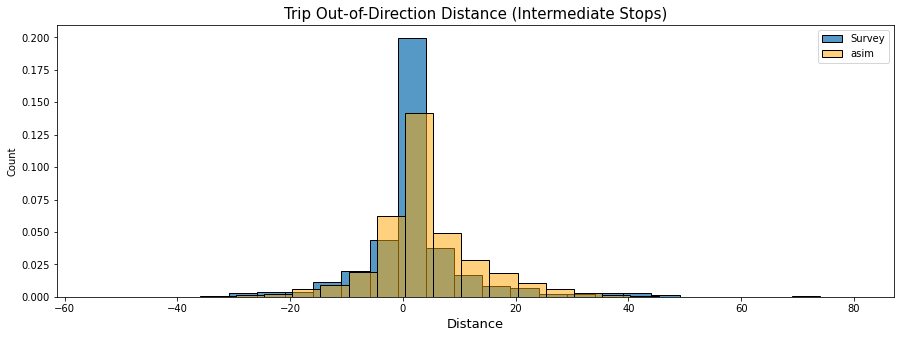

In [109]:

fig, ax = plt.subplots(figsize=(15,5))
asim_trips_w_dist['sample_rate'] = 1
# sns.histplot(data=Survey_trips_out, weights=Survey_trips_out.sample_rate_share,x='depart',binwidth = 1, ax=ax, label='Survey', alpha=0.5,)
Survey_trips_w_dist['sample_rate_share'] = Survey_trips_w_dist['sample_rate']/Survey_trips_w_dist['sample_rate'].sum()
asim_trips_w_dist['sample_rate_share'] = asim_trips_w_dist['sample_rate']/asim_trips_w_dist['sample_rate'].sum()
sns.histplot(data = Survey_trips_w_dist, x = 'outdirection', label='Survey', binwidth = 5,weights = Survey_trips_w_dist.sample_rate_share, ax=ax, fill=True)
sns.histplot(data = asim_trips_w_dist, x = 'outdirection', label='asim', binwidth = 5,weights = asim_trips_w_dist.sample_rate_share,ax=ax, fill=True,alpha=0.5, color = 'orange')
ax.legend()
ax.set_xlabel('Distance', fontsize=13)
ax.set_title('Trip Out-of-Direction Distance (Intermediate Stops)', fontsize=15)

In [110]:
out_direction = asim_trips_w_dist.append(Survey_trips_w_dist).groupby(['poe_id'])[['outdirection','sample_rate']].sum()
out_direction['Avg Out of Direction Distance'] = out_direction['outdirection']/out_direction['sample_rate']
out_direction[['Avg Out of Direction Distance']]

,Avg Out of Direction Distance
poe_id,
0.0,0.8
1.0,0.9
2.0,-0.2


In [111]:
# Survey_trips_w_dist_tecate = Survey_trips_w_dist[Survey_trips_w_dist.poe_id == 2]
# asim_trips_w_dist_tecate = asim_trips_w_dist[asim_trips_w_dist.poe_id == 2]
# fig, ax = plt.subplots(figsize=(15,5))
# sns.histplot(data = Survey_trips_w_dist_tecate, x = 'outdirection', label='Survey', binwidth = 5,weights = Survey_trips_w_dist_tecate.sample_rate_share, ax=ax, fill=True)
# sns.histplot(data = asim_trips_w_dist_tecate, x = 'outdirection', label='asim', binwidth = 5,weights = asim_trips_w_dist_tecate.sample_rate_share,ax=ax, fill=True,alpha=0.5, color = 'orange')
# ax.legend()
# ax.set_xlabel('Distance', fontsize=13)
# ax.set_title('Trip Out-of-Direction Distance TECATE (Intermediate Stops)', fontsize=15)

In [112]:
# Survey_trips_w_dist_otay = Survey_trips_w_dist[Survey_trips_w_dist.poe_id == 1]
# asim_trips_w_dist_otay = asim_trips_w_dist[asim_trips_w_dist.poe_id == 1]
# fig, ax = plt.subplots(figsize=(15,5))
# sns.histplot(data = Survey_trips_w_dist_otay, x = 'outdirection', label='Survey', binwidth = 5,weights = Survey_trips_w_dist_otay.sample_rate_share, ax=ax, fill=True)
# sns.histplot(data = asim_trips_w_dist_otay, x = 'outdirection', label='asim', binwidth = 5,weights = asim_trips_w_dist_otay.sample_rate_share,ax=ax, fill=True,alpha=0.5, color = 'orange')
# ax.legend()
# ax.set_xlabel('Distance', fontsize=13)
# ax.set_title('Trip Out-of-Direction Distance OTAY MESA (Intermediate Stops)', fontsize=15)

In [113]:
# Survey_trips_w_dist_sanysidro = Survey_trips_w_dist[Survey_trips_w_dist.poe_id == 0]
# asim_trips_w_dist_sanysidro = asim_trips_w_dist[asim_trips_w_dist.poe_id == 0]
# fig, ax = plt.subplots(figsize=(15,5))
# sns.histplot(data = Survey_trips_w_dist_sanysidro, x = 'outdirection', label='Survey', binwidth = 5,weights = Survey_trips_w_dist_sanysidro.sample_rate_share, ax=ax, fill=True)
# sns.histplot(data = asim_trips_w_dist_sanysidro, x = 'outdirection', label='asim', binwidth = 5,weights = asim_trips_w_dist_sanysidro.sample_rate_share,ax=ax, fill=True,alpha=0.5, color = 'orange')
# ax.legend()
# ax.set_xlabel('Distance', fontsize=13)
# ax.set_title('Trip Out-of-Direction Distance SAN YSIDRO (Intermediate Stops)', fontsize=15)

In [114]:
# fig, ax = plt.subplots(figsize=(15,5))
# sns.kdeplot(Survey_trips_w_dist['outdirection'], label='Survey',weights = Survey_trips_w_dist.sample_rate, ax=ax, fill=True)
# sns.kdeplot(asim_trips_w_dist['outdirection'], label='asim', ax=ax, fill=True)
# ax.legend()
# ax.set_xlabel('Distance', fontsize=13)
# ax.set_title('Trip Out-of-Direction Distance (all trips)', fontsize=15)

## Trip Mode

Text(0.5, 0, 'trip mode')

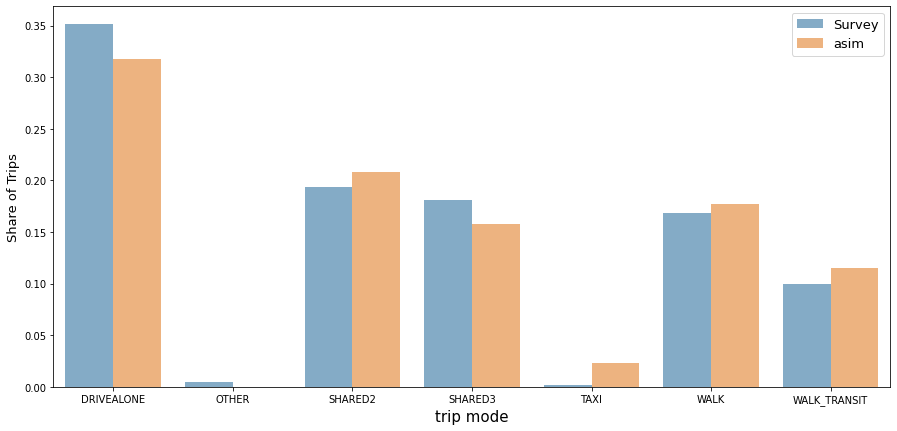

In [115]:
fig, ax = plt.subplots(figsize=(15,7))
trip_mode = asim_trips.groupby('trip_mode')[['trip_id']].count()
trip_mode['trip_id'] = trip_mode['trip_id']/trip_mode['trip_id'].sum()
trip_mode_svy = Survey_trips.groupby('trip_mode')[['sample_rate']].sum()
trip_mode_svy['sample_rate'] = trip_mode_svy['sample_rate']/trip_mode_svy['sample_rate'].sum()
trip_mode = pd.merge(
    trip_mode, trip_mode_svy,
    left_index=True, right_index=True, how='outer').reset_index()
trip_mode.columns = ['trip_mode','asim','Survey']
trip_mode = trip_mode.melt(id_vars='trip_mode',var_name='source',value_name='num_trips')
g = sns.barplot(
    data=trip_mode.sort_values('source'), x='trip_mode', y='num_trips', 
    hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('Share of Trips', fontsize=13)
ax.set_xlabel('trip mode', fontsize=15)

In [116]:
trip_mode_calib = trip_mode.pivot(index = 'trip_mode',columns = 'source', values = 'num_trips')
trip_mode_calib['fac'] = np.log(trip_mode_calib['Survey']/trip_mode_calib['asim'])
trip_mode_calib.to_excel(writer,sheet_name = 'tripmode_calib')
trip_mode_calib.loc['Total'] = trip_mode_calib.sum()
# trip_mode_calib

###  Trip Mode by Tour Mode

In [117]:
trip_mode = asim_trips.groupby(['trip_mode','tour_mode'])['trip_id'].count().fillna(0)
trip_mode = pd.merge(
    trip_mode, Survey_trips.groupby(['trip_mode','tour_mode'])['sample_rate'].sum().fillna(0),
    left_index=True, right_index=True, how='outer').reset_index()
trip_mode.columns = ['trip_mode','tour_mode','asim','Survey']
trip_mode_long = trip_mode.melt(id_vars=['trip_mode','tour_mode'],var_name='source',value_name='num_trips').fillna(0)

tour_mode_sums = trip_mode_long.groupby(['tour_mode', 'source'])['num_trips'].sum().reset_index()
tour_mode_sums.rename(columns={'num_trips': 'total_trips'}, inplace=True)
trip_mode_long = trip_mode_long.merge(tour_mode_sums, on=['tour_mode','source'])

trip_mode_long['pct_trips'] = trip_mode_long['num_trips'] / trip_mode_long['total_trips']

In [118]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     g = sns.catplot(
#         data=trip_mode_long, x='trip_mode', y='num_trips', col='tour_mode', col_wrap=2, kind='bar',
#         hue='source',alpha=0.6, aspect=1.5, facet_kws={'despine':False})
#     # g.set_yscale("log")
#     g._legend.set_title('')
#     plt.setp(g._legend.get_texts(), fontsize=15)
#     g.set_axis_labels("trip mode", "# trips", fontsize=20)
#     g.fig.subplots_adjust(top=0.9)
#     g.fig.suptitle('Trip Mode by Tour Mode (total)')
#     for ax in g.axes.ravel():
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

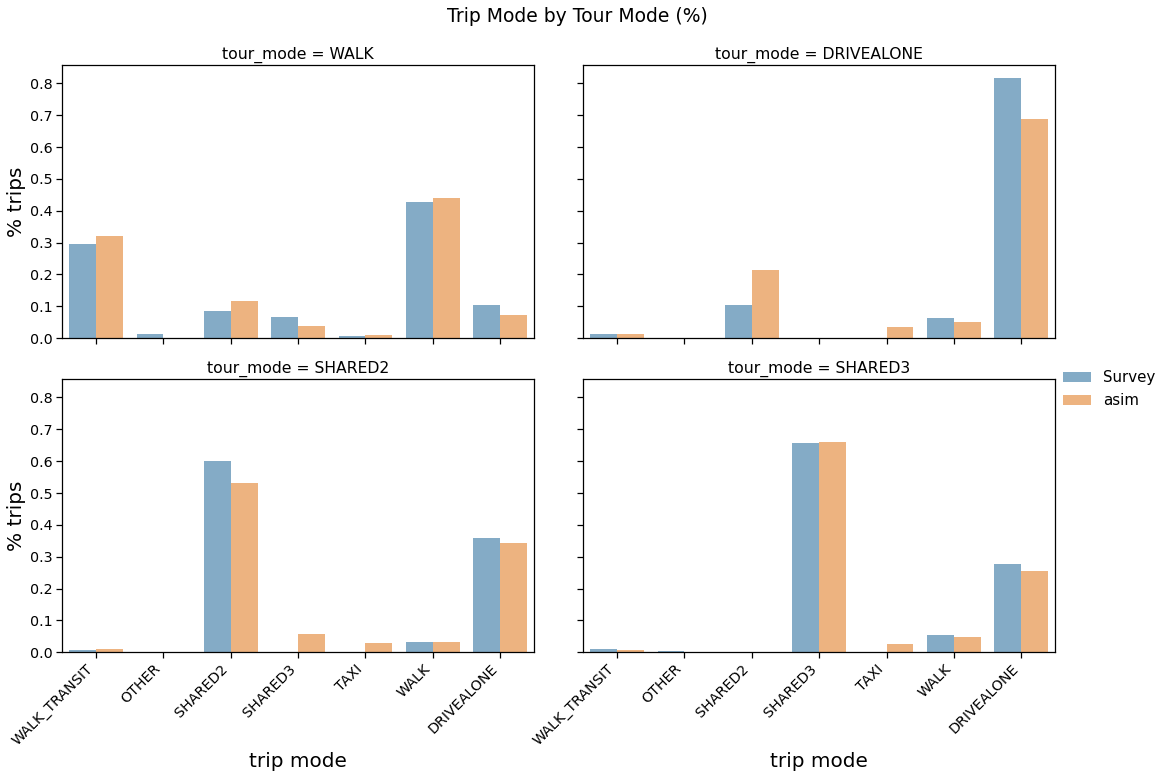

In [119]:
with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.catplot(
        data=trip_mode_long.sort_values('source'), x='trip_mode', y='pct_trips', col='tour_mode', col_wrap=2, kind='bar',
        hue='source',alpha=0.6, aspect=1.5, facet_kws={'despine':False})
    # g.set_yscale("log")
    g._legend.set_title('')
    plt.setp(g._legend.get_texts(), fontsize=15)
    g.set_axis_labels("trip mode", "% trips", fontsize=20)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle('Trip Mode by Tour Mode (%)')
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [120]:
trippurp_calib = trip_mode_long.groupby(['tour_mode','source','trip_mode'],as_index = False)[['pct_trips']].sum()
# trippurp_calib.loc[trippurp_calib.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'
trippurp_calib = trippurp_calib.pivot_table(index = ['tour_mode','trip_mode'],
                                                                              values = 'pct_trips',
                                                                              columns = 'source')
trippurp_calib['fac'] = np.log(trippurp_calib['Survey']/trippurp_calib['asim'])
trippurp_calib.to_excel(writer,sheet_name = 'trippurp_calib')
writer.save()
# trippurp_calib.reset_index().groupby('tour_mode')[['Survey','asim']].sum()

In [121]:
# trippurp_calib


In [122]:
writer.close()

<!-- ### Trip Distance by Trip Mode -->

In [123]:
asim_trips_w_dist['sample_rate'] = 1


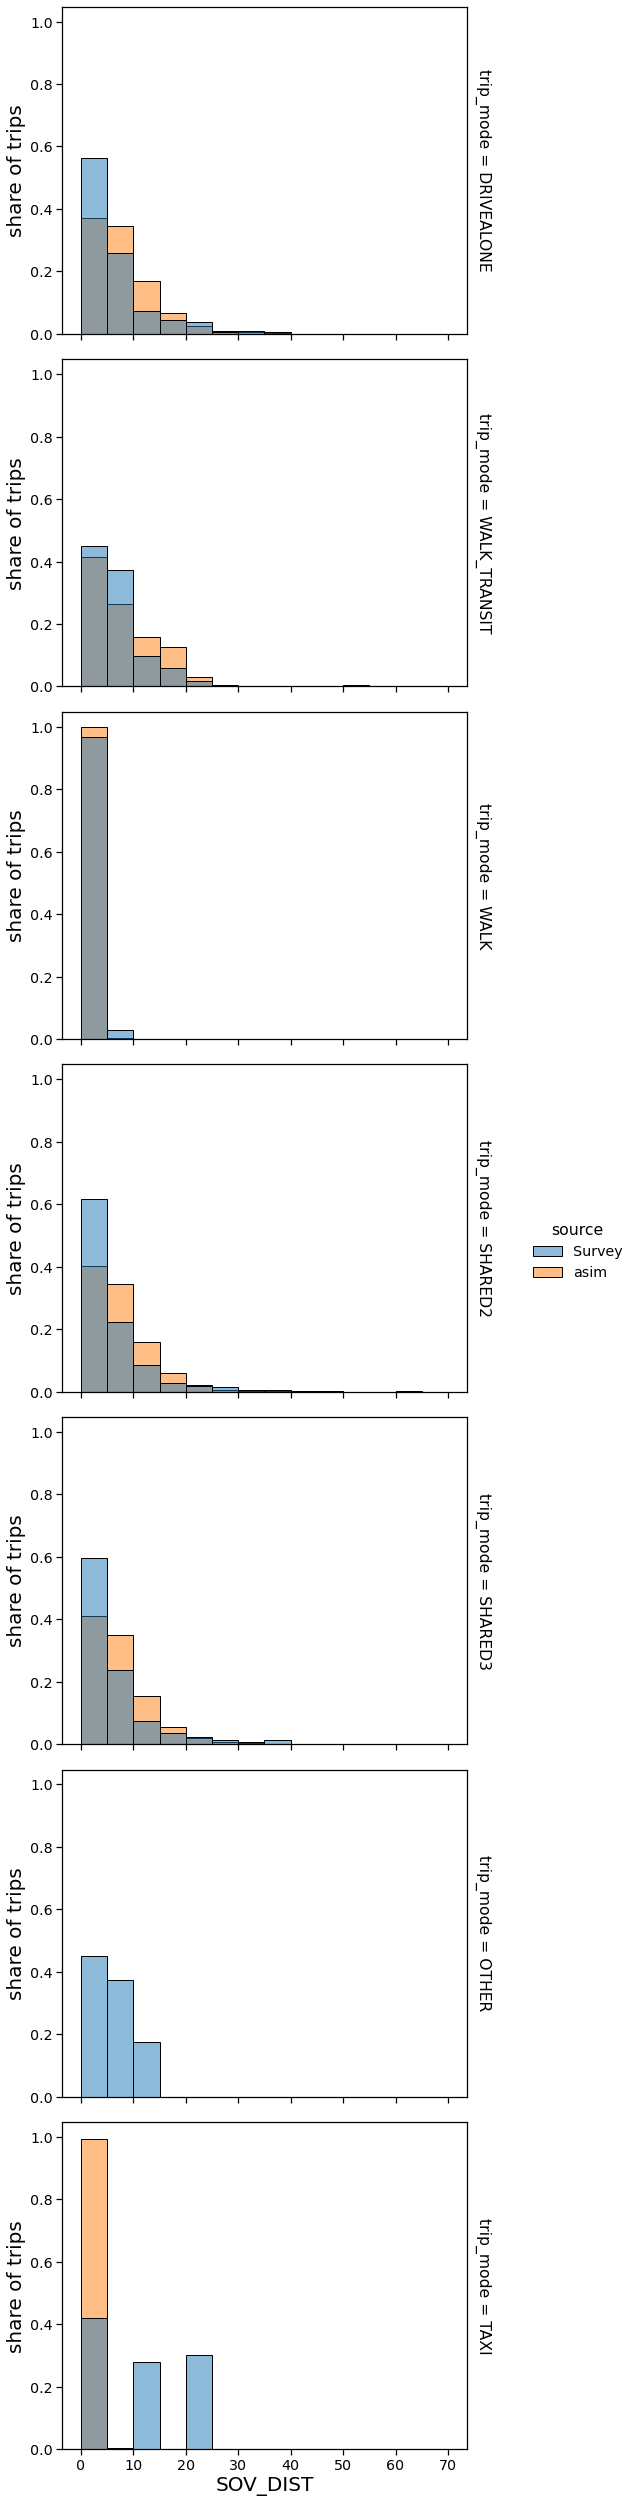

In [124]:
trip_dist_by_mode = pd.concat(
    (asim_trips_w_dist[['trip_mode','sov_dist','source','sample_rate']], Survey_trips_w_dist[['trip_mode','sov_dist','source','sample_rate']]), names=['asim','Survey'])
# trip_dist_by_mode = trip_dist_by_mode[trip_dist_by_mode.trip_mode == 'WALK']
for src in ['asim','Survey']:
    for mode in trip_dist_by_mode.trip_mode.unique():
        trip_dist_by_mode.loc[(trip_dist_by_mode.source == src) &(trip_dist_by_mode.trip_mode == mode) ,'sample_rate_mode'] = trip_dist_by_mode[(trip_dist_by_mode.source == src) &(trip_dist_by_mode.trip_mode == mode)].sample_rate/trip_dist_by_mode[(trip_dist_by_mode.source == src) &(trip_dist_by_mode.trip_mode == mode)].sample_rate.sum()
trip_dist_by_mode = trip_dist_by_mode.reset_index()
with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.displot(
        data=trip_dist_by_mode.sort_values('source'), x='sov_dist', row='trip_mode',hue='source',
        kind='hist', binwidth = 5,fill=True, aspect=1.5, common_norm=False,weights =trip_dist_by_mode.sort_values('source').sample_rate_mode,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})
    g.set_axis_labels("SOV_DIST", "share of trips", fontsize=20)

In [125]:

# with sns.plotting_context("notebook",font_scale=1):
#     g = sns.FacetGrid(trip_dist_by_mode.sort_values('source'), col="trip_mode", col_wrap=2, hue='source',
#                       height=4, aspect=1.5,sharex=False, sharey=False, despine=False)
#     g.map(sns.kdeplot, "sov_dist", fill=True, alpha=0.4)
#     g.set_titles(col_template="{col_name}")
#     g.set_axis_labels("SOV distance (TAZ-TAZ)", "density", fontsize=16)
#     g.add_legend()
#     g.fig.subplots_adjust(top=0.95)
#     g.fig.suptitle('Trip Distance by Trip Mode',fontsize=20)

In [126]:
# trip_dist_by_mode[trip_dist_by_mode['trip_mode'] == 'TAXI']